In [28]:
MERCHAINDISE = 'LTCUSDT'
DAYS = 100
START_DATE = '2021-9-7'
END_DATE = '2021-9-28'
    

### BOOKMARK

Go to <a href=#bookmark1>1 hour</a>

In [29]:
# Private function

def report_by_hour(hour): 
    hour_observe = hour
    data_prices_str = f"data_prices_{hour_observe}"
    type_continuous_str = f"type_continuous_{hour_observe}"

    data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
    data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

    print(f"Giờ {hour_observe}")
    print("________________________________")
    print(data_prices_up['hour_return'].describe())
    print(data_prices_up['hour_return'].sum())


    print("+++")
    print(data_prices_down['hour_return'].describe())
    print(data_prices_down['hour_return'].sum())

    data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


    print('____________________________________________________________')

    data_prices_by_hour = data_prices[(data_prices['hour'] == hour_observe)]

    data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')

    type_continuous_group = data_prices_by_hour.groupby([type_continuous_str]).size()

    labels = type_continuous_group.index.values
    sizes = type_continuous_group.values

    plt.figure()
    fig1, ax1 = plt.subplots(figsize=(12, 7))
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.legend()
    plt.show()

    print(type_continuous_group)

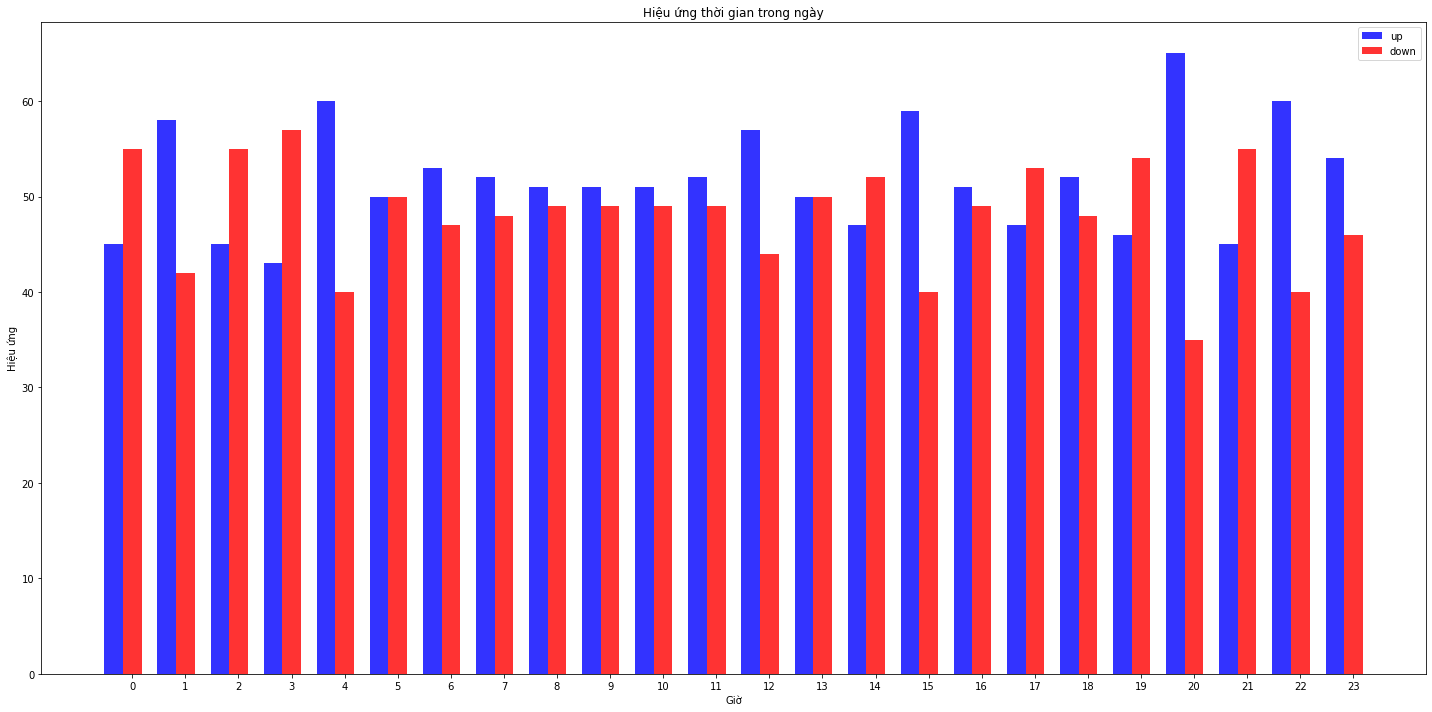

______________________________Hour return____________________________
________________________________
count    1244.000000
mean        0.745368
std         1.036291
min         0.000000
25%         0.222810
50%         0.511713
75%         0.976227
max        24.942529
Name: hour_return, dtype: float64
927.2383622316122
+++
count    1156.000000
mean       -0.774566
std         0.911959
min       -17.909761
25%        -0.986517
50%        -0.567422
75%        -0.273002
max        -0.016039
Name: hour_return, dtype: float64
-895.3983826482477
______________________________Loại tiếp diễn____________________________


<Figure size 720x720 with 0 Axes>

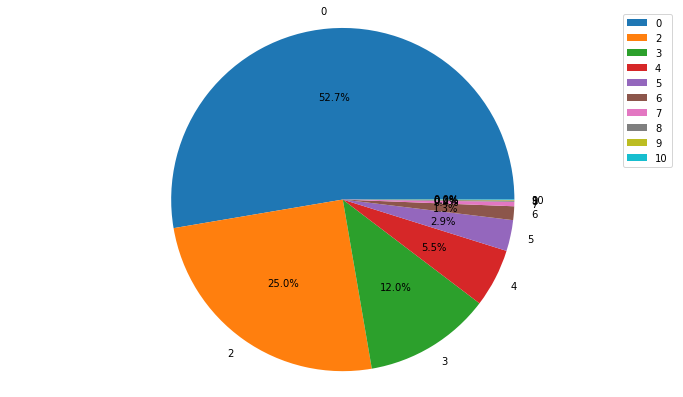

type_continuous
0     1264
2      601
3      287
4      132
5       70
6       31
7       10
8        3
9        1
10       1
dtype: int64
______________________________Thời gian biến động nhất____________________________


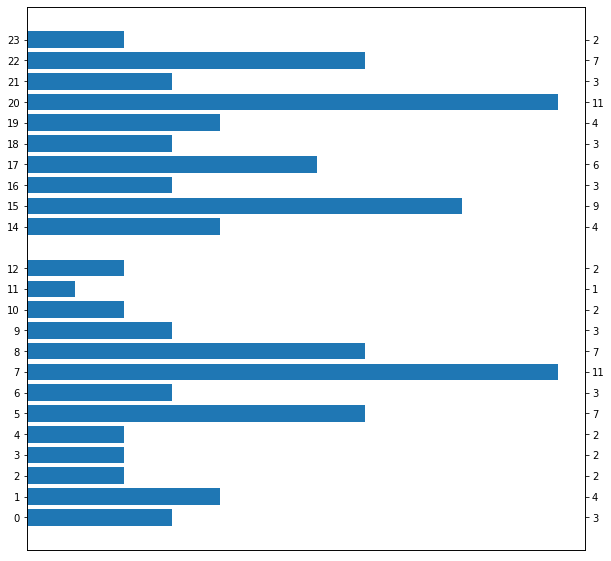

In [30]:
from myenv.models.candlestick import Candlestick
from myenv.helpers.constants import HIGH_INDEX, LOW_INDEX, OPEN_INDEX, CLOSE_INDEX
from myenv.models.merchandise_rate import MerchandiseRate
from myenv.helpers.utils import percentage_change, candlestick_type, type_continuous, until_now_type, candlestick_type_by_hour
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


merchandise_rate = MerchandiseRate()
merchandise_rate_id = merchandise_rate.find_by_slug(MERCHAINDISE)
candlestick = Candlestick(merchandise_rate_id, 'hour', 24*DAYS, "DESC")
# candlestick = Candlestick(merchandise_rate_id, 'hour', 24*50, "DESC", start_date='2021-9-7', end_date='2021-9-28')

data_prices = candlestick.to_df()


# data_prices['hour_return'] = percentage_change(data_prices, LOW_INDEX, HIGH_INDEX)
# data_prices['hour_return'] = data_prices['close'].pct_change() * 100
data_prices['hour_return'] = percentage_change(data_prices,OPEN_INDEX, CLOSE_INDEX)
data_prices['day'] = data_prices[['open']].apply(
    lambda x: x.name.strftime("%Y-%m-%d"), axis=1)
data_prices['hour'] = data_prices[['open']].apply(
    lambda x: x.name.hour, axis=1)

total = data_prices.iloc[:, 0].count()
first_date = data_prices.iloc[0].name.date()
last_date = data_prices.iloc[-1].name.date()

data_prices['type'] = candlestick_type(data_prices)
data_prices['type_continuous'] = type_continuous(data_prices)

index = np.arange(24)
bar_width = 0.35
opacity = 0.8

x = ()
y = ()


for i in np.arange(24):
    data_prices_x = data_prices[data_prices['hour'] == i]

    number_up = len(data_prices_x[data_prices_x['type'] == 'up'])
    number_down = len(data_prices_x[data_prices_x['type'] == 'down'])

    x = x + (number_up,)
    y = y + (number_down,)


plt.figure(figsize=[20,10])
plt.rcParams['figure.figsize'] = [10, 10]

rects1 = plt.bar(index, x, bar_width,
                 alpha=opacity, color='b', label='up')

rects2 = plt.bar(index + bar_width, y, bar_width,
                 alpha=opacity, color='r', label='down')
plt.xlabel('Giờ')
plt.ylabel('Hiệu ứng')
plt.title(
    f"Hiệu ứng thời gian trong ngày")
plt.xticks(index + bar_width, tuple(np.arange(24)))
plt.legend()
plt.tight_layout()
plt.show()


data_prices_up = data_prices[data_prices['type'] == 'up']
data_prices_down = data_prices[data_prices['type'] == 'down']

print("______________________________Hour return____________________________")

print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())


print("______________________________Loại tiếp diễn____________________________")

type_continuous_group = data_prices.groupby(['type_continuous']).size()


labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

print(type_continuous_group)


print("______________________________Thời gian biến động nhất____________________________")


def highest_in_day(x):
    max = data_prices[data_prices.day == x.day].hour_return.max()
    return data_prices[(data_prices.day == x.day) & (data_prices.hour_return == max)].hour.iat[0]


data_prices['highest_in_day'] = data_prices[[
    'day']].apply(lambda x: highest_in_day(x), axis=1)

highest_in_day_group = data_prices.groupby(
    'day').mean().groupby('highest_in_day').count()


list_hours = [int(hour) for hour in highest_in_day_group.index.values.tolist()]
list_highest_in_day = highest_in_day_group['hour'].tolist()

plt.rcParams['figure.figsize'] = [10, 10]

fig, ax = plt.subplots()
ax.barh(list_hours, list_highest_in_day, align='center')

ax.set_yticks(list_hours)
ax.set_yticklabels(list_hours)
ax.set_xticks([])

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(list_hours)
ax2.set_yticklabels(list_highest_in_day)

plt.show()


Giờ 1
________________________________
count    58.000000
mean      0.613717
std       0.837881
min       0.000000
25%       0.162492
50%       0.314064
75%       0.706649
max       4.958295
Name: hour_return, dtype: float64
35.59560898213659
+++
count    42.000000
mean     -0.626512
std       0.538045
min      -2.123027
25%      -0.964212
50%      -0.517493
75%      -0.183570
max      -0.022563
Name: hour_return, dtype: float64
-26.31351629474163
____________________________________________________________


<ipython-input-29-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


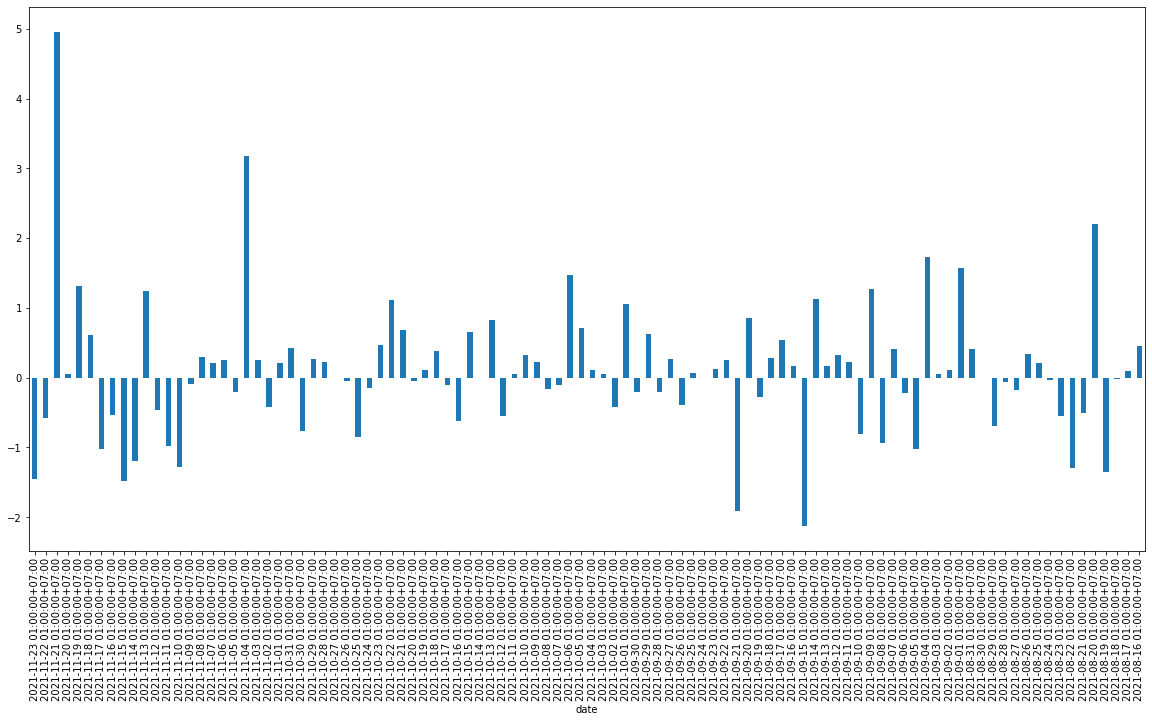

<Figure size 720x720 with 0 Axes>

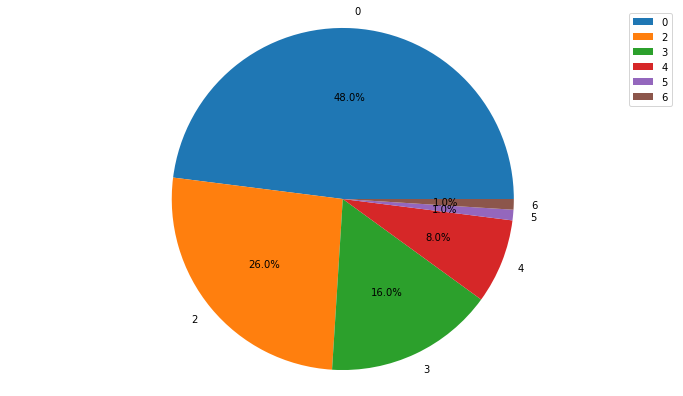

type_continuous_1
0    48
2    26
3    16
4     8
5     1
6     1
dtype: int64


In [31]:
hour_observe = 1
data_price_1 = data_prices[(data_prices['hour'] == hour_observe)]
report_by_hour(hour_observe)


Left off here <a name='bookmark1'> test </a>

Giờ 2
________________________________
count    45.000000
mean      0.581465
std       0.493968
min       0.000000
25%       0.197889
50%       0.456882
75%       0.923889
max       2.225755
Name: hour_return, dtype: float64
26.16591882617514
+++
count    55.000000
mean     -0.670008
std       0.512059
min      -2.072357
25%      -0.900004
50%      -0.579065
75%      -0.295606
max      -0.052301
Name: hour_return, dtype: float64
-36.85042748875373
____________________________________________________________


<ipython-input-29-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


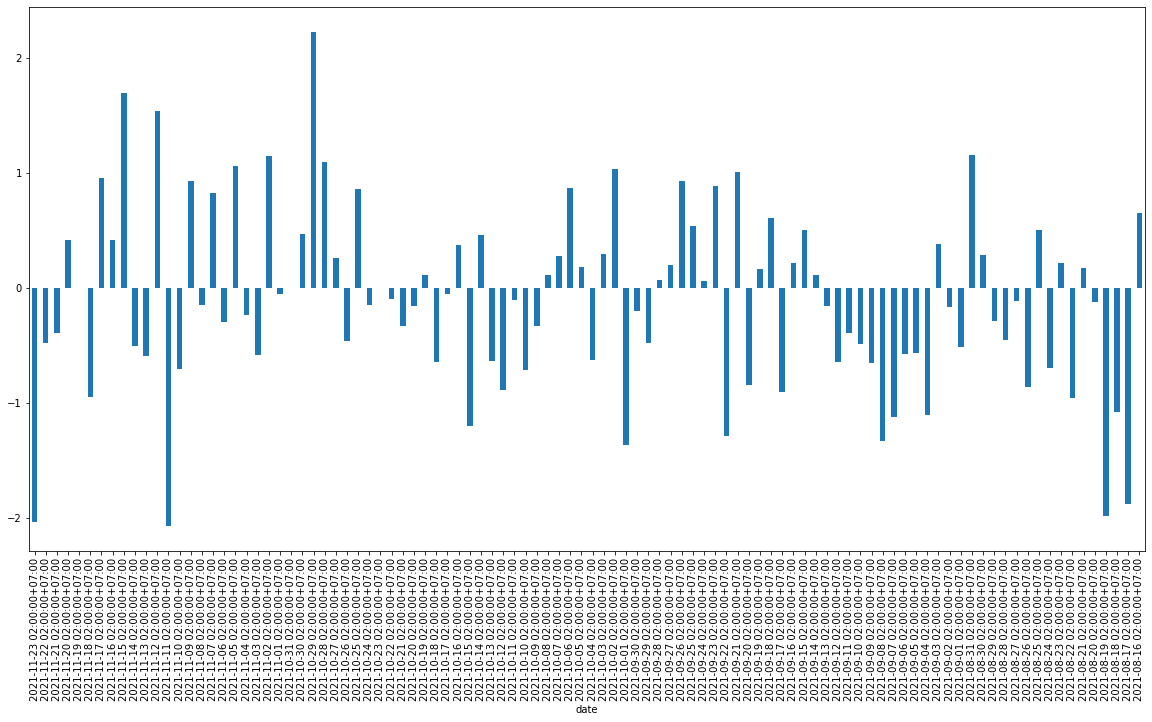

<Figure size 720x720 with 0 Axes>

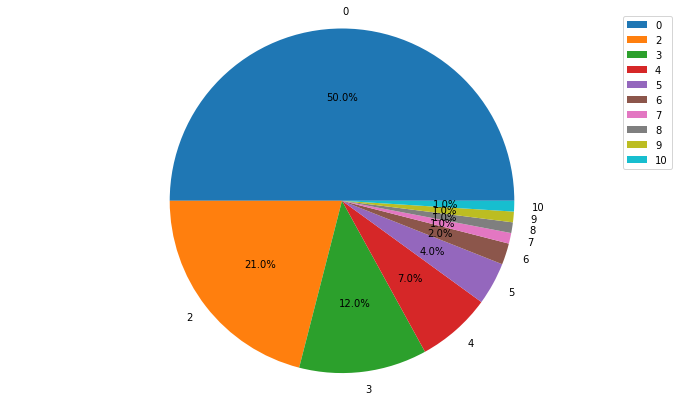

type_continuous_2
0     50
2     21
3     12
4      7
5      4
6      2
7      1
8      1
9      1
10     1
dtype: int64


In [32]:
hour_observe = 2

data_price_2 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 3
________________________________
count    43.000000
mean      0.585510
std       0.414166
min       0.000000
25%       0.297153
50%       0.501253
75%       0.870340
max       1.614435
Name: hour_return, dtype: float64
25.176911153369012
+++
count    57.000000
mean     -0.848344
std       0.727358
min      -3.841991
25%      -1.182432
50%      -0.751011
75%      -0.299268
max      -0.044250
Name: hour_return, dtype: float64
-48.35558168779357
____________________________________________________________


<ipython-input-29-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


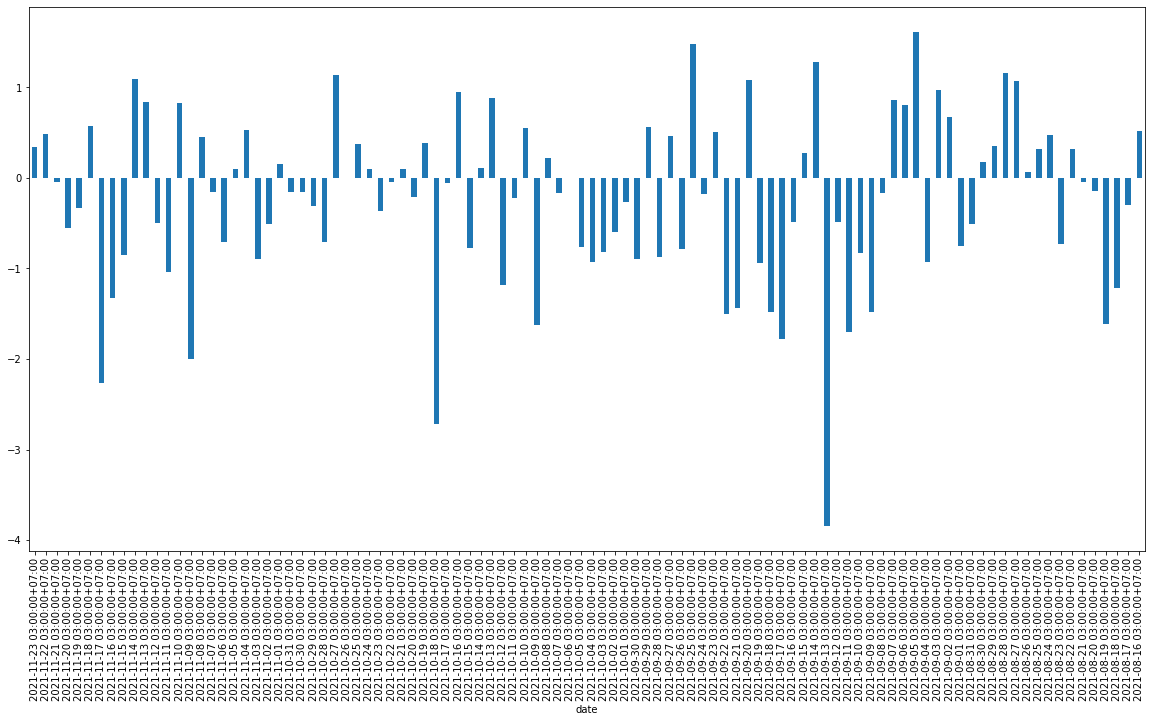

<Figure size 720x720 with 0 Axes>

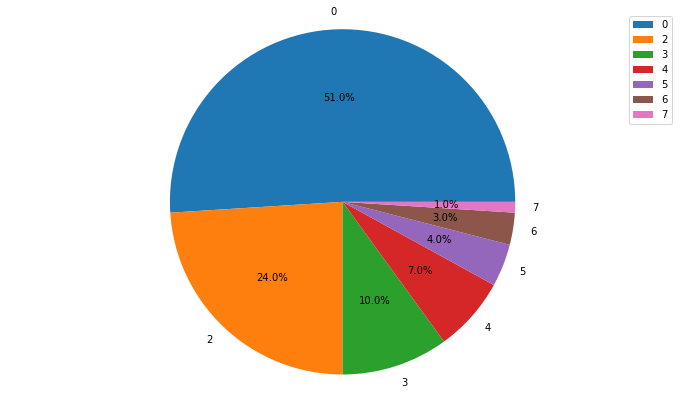

type_continuous_3
0    51
2    24
3    10
4     7
5     4
6     3
7     1
dtype: int64


In [33]:
hour_observe = 3

data_price_3 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 4
________________________________
count    60.000000
mean      0.594051
std       0.605138
min       0.000000
25%       0.207565
50%       0.451413
75%       0.707396
max       3.802281
Name: hour_return, dtype: float64
35.64305048959015
+++
count    40.000000
mean     -0.753942
std       1.067625
min      -6.632838
25%      -0.908050
50%      -0.535152
75%      -0.214967
max      -0.046019
Name: hour_return, dtype: float64
-30.15768590256408
____________________________________________________________


<ipython-input-29-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


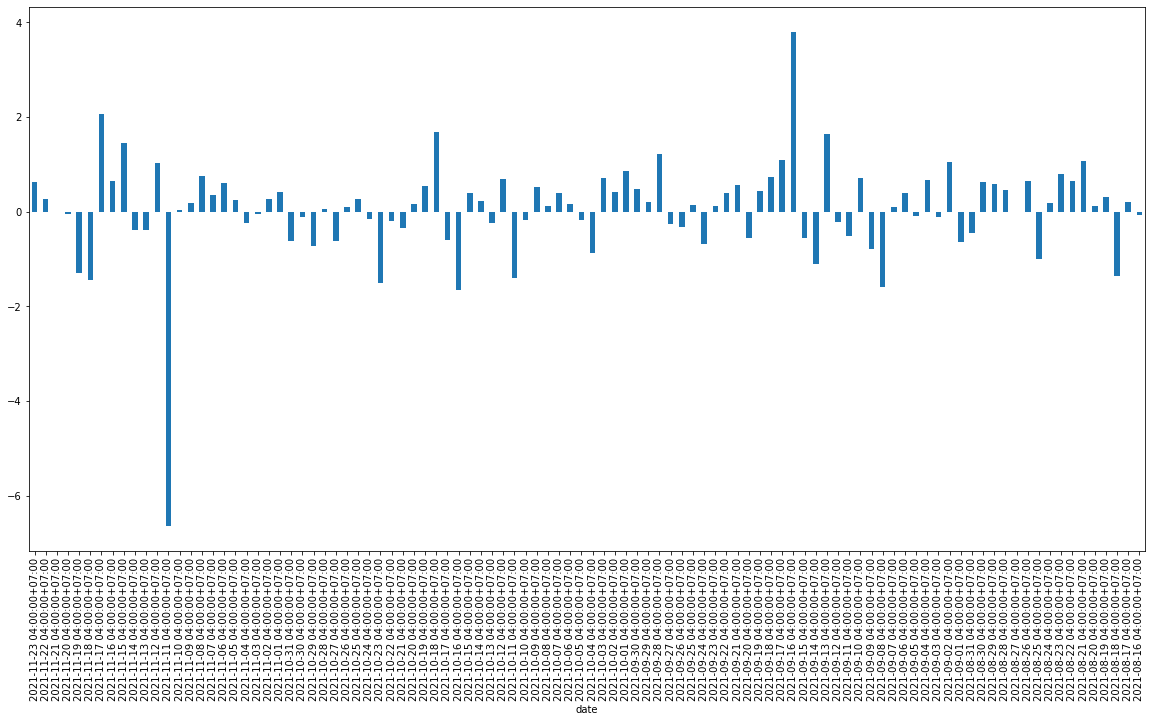

<Figure size 720x720 with 0 Axes>

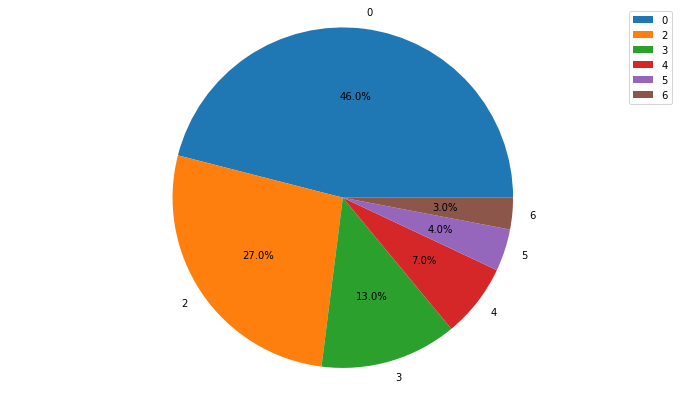

type_continuous_4
0    46
2    27
3    13
4     7
5     4
6     3
dtype: int64


In [34]:
hour_observe = 4

data_price_4 = data_prices[(data_prices['hour'] == hour_observe)]


report_by_hour(hour_observe)

Giờ 5
________________________________
count    50.000000
mean      0.781489
std       0.535002
min       0.052659
25%       0.374888
50%       0.647917
75%       1.175554
max       2.178899
Name: hour_return, dtype: float64
39.074467097665305
+++
count    50.000000
mean     -0.705551
std       0.616435
min      -2.574257
25%      -0.957219
50%      -0.519192
75%      -0.268928
max      -0.042845
Name: hour_return, dtype: float64
-35.277533037787876
____________________________________________________________


<ipython-input-29-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


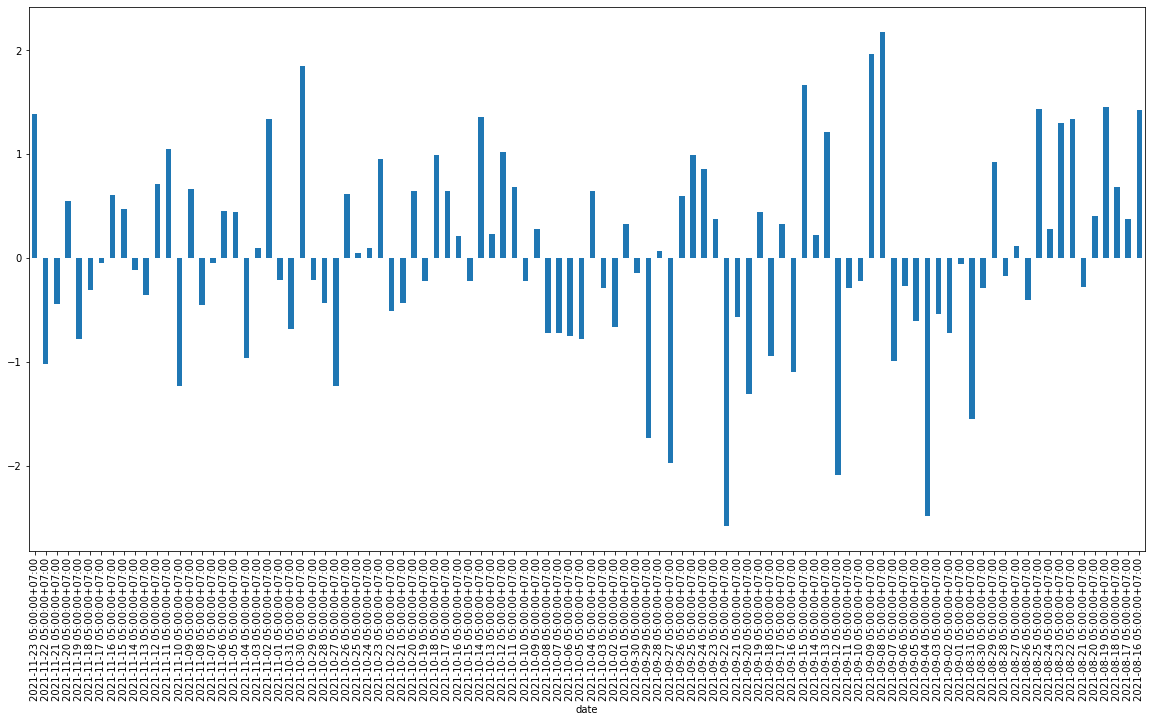

<Figure size 720x720 with 0 Axes>

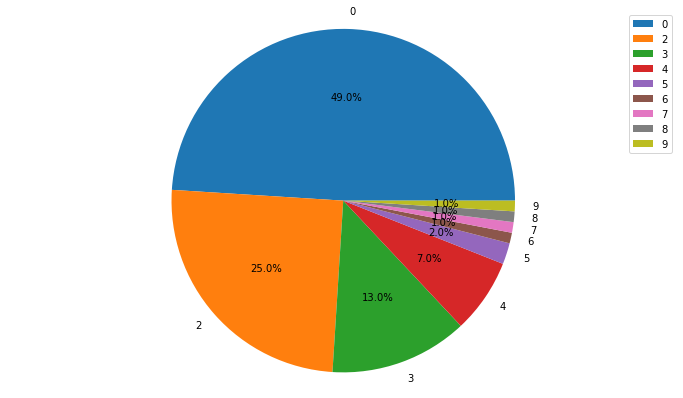

type_continuous_5
0    49
2    25
3    13
4     7
5     2
6     1
7     1
8     1
9     1
dtype: int64


In [35]:
hour_observe = 5

data_price_5 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 6
________________________________
count    53.000000
mean      0.603878
std       0.653270
min       0.000000
25%       0.165654
50%       0.442696
75%       0.727476
max       2.971175
Name: hour_return, dtype: float64
32.00555042558956
+++
count    47.000000
mean     -0.876426
std       0.699674
min      -2.488231
25%      -1.369848
50%      -0.656566
75%      -0.305169
max      -0.016039
Name: hour_return, dtype: float64
-41.19204350587147
____________________________________________________________


<ipython-input-29-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


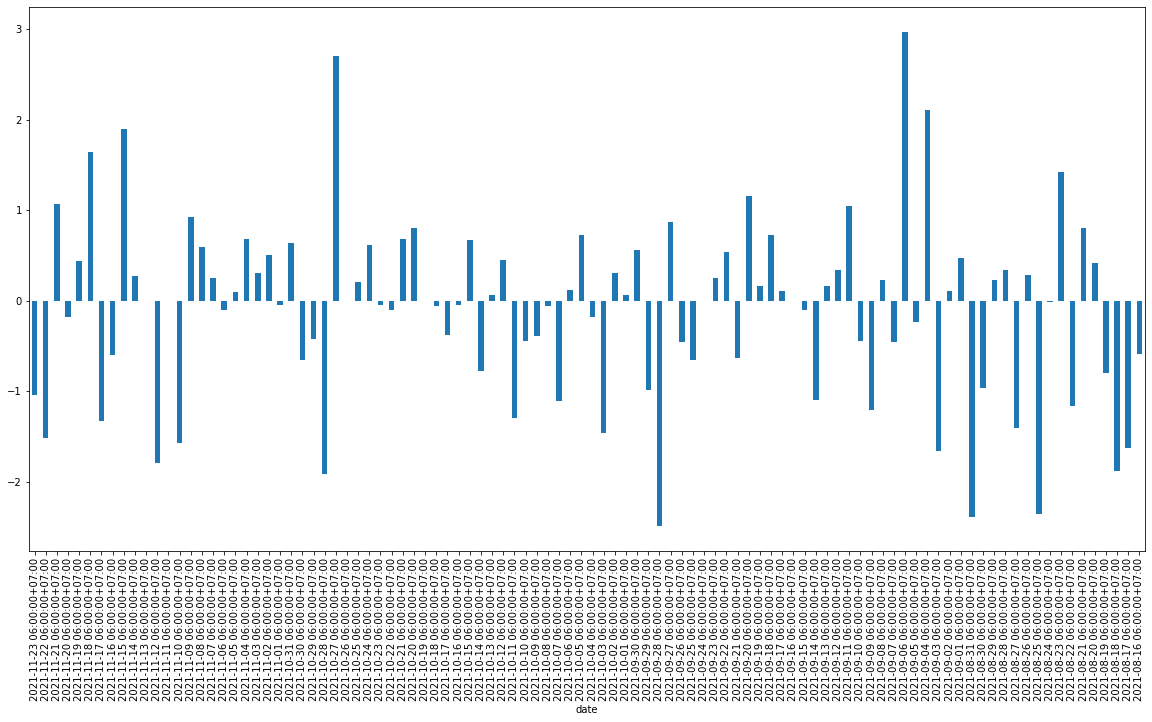

<Figure size 720x720 with 0 Axes>

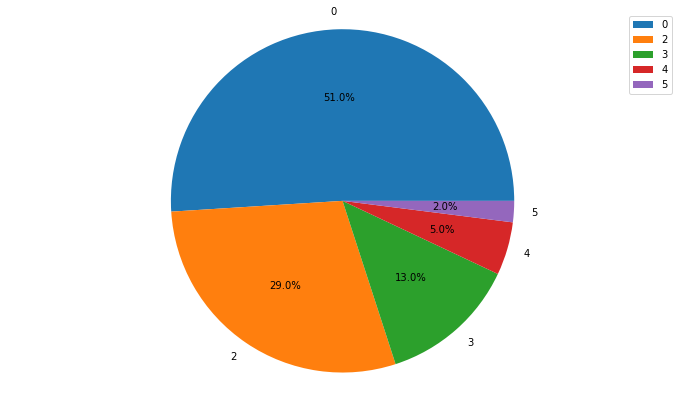

type_continuous_6
0    51
2    29
3    13
4     5
5     2
dtype: int64


In [36]:
hour_observe = 6

data_price_6 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 7
________________________________
count    52.000000
mean      1.123724
std       0.697902
min       0.045893
25%       0.678147
50%       0.992237
75%       1.485330
max       3.711790
Name: hour_return, dtype: float64
58.433653920715734
+++
count    48.000000
mean     -1.019157
std       0.684376
min      -3.992395
25%      -1.294076
50%      -0.987752
75%      -0.572310
max      -0.054615
Name: hour_return, dtype: float64
-48.91952916663902
____________________________________________________________


<ipython-input-29-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


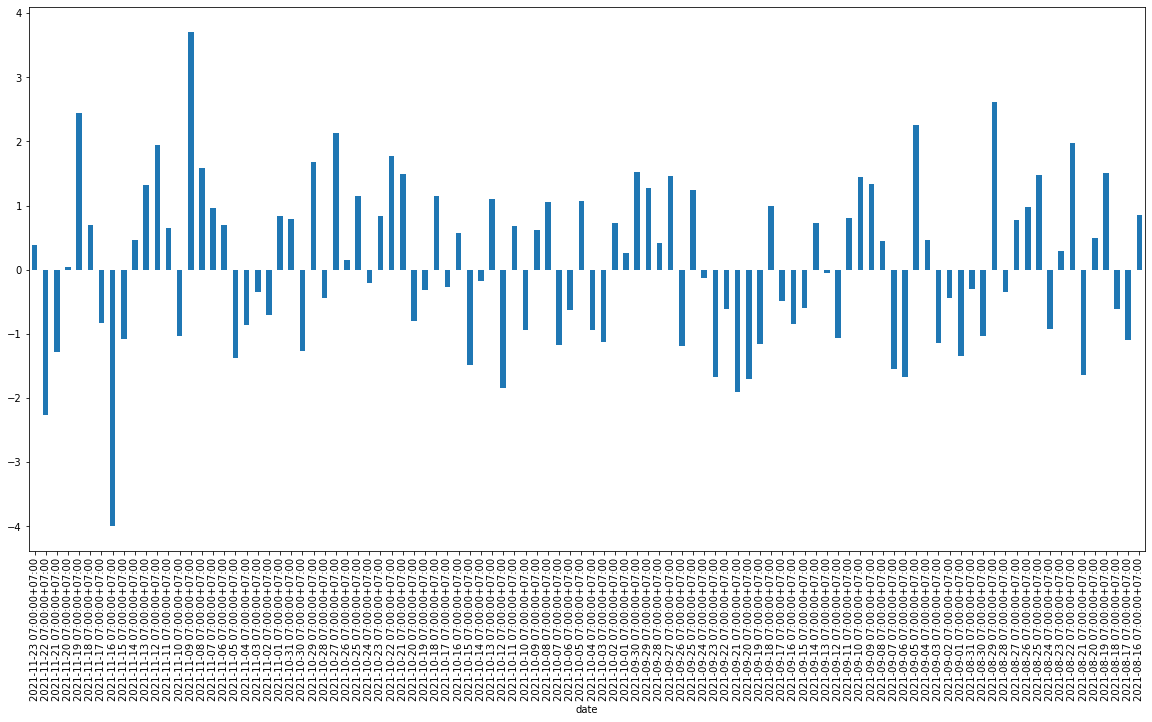

<Figure size 720x720 with 0 Axes>

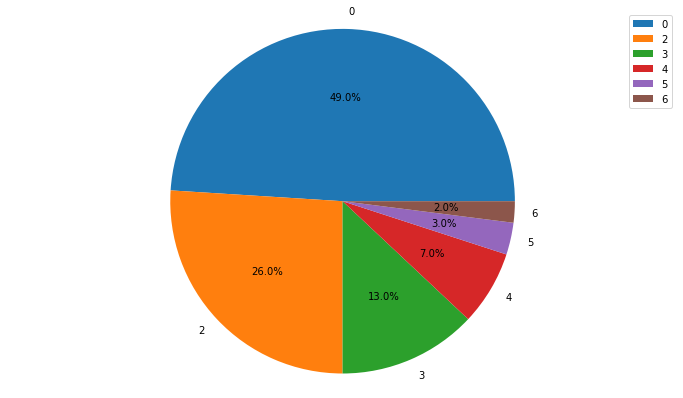

type_continuous_7
0    49
2    26
3    13
4     7
5     3
6     2
dtype: int64


In [37]:
hour_observe = 7

data_price_7 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 8
________________________________
count    51.000000
mean      0.876257
std       0.900218
min       0.000000
25%       0.235350
50%       0.587128
75%       1.157152
max       4.085603
Name: hour_return, dtype: float64
44.68909515994081
+++
count    49.000000
mean     -0.696204
std       0.578781
min      -2.594340
25%      -0.903444
50%      -0.515759
75%      -0.306212
max      -0.052438
Name: hour_return, dtype: float64
-34.114006502739514
____________________________________________________________


<ipython-input-29-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


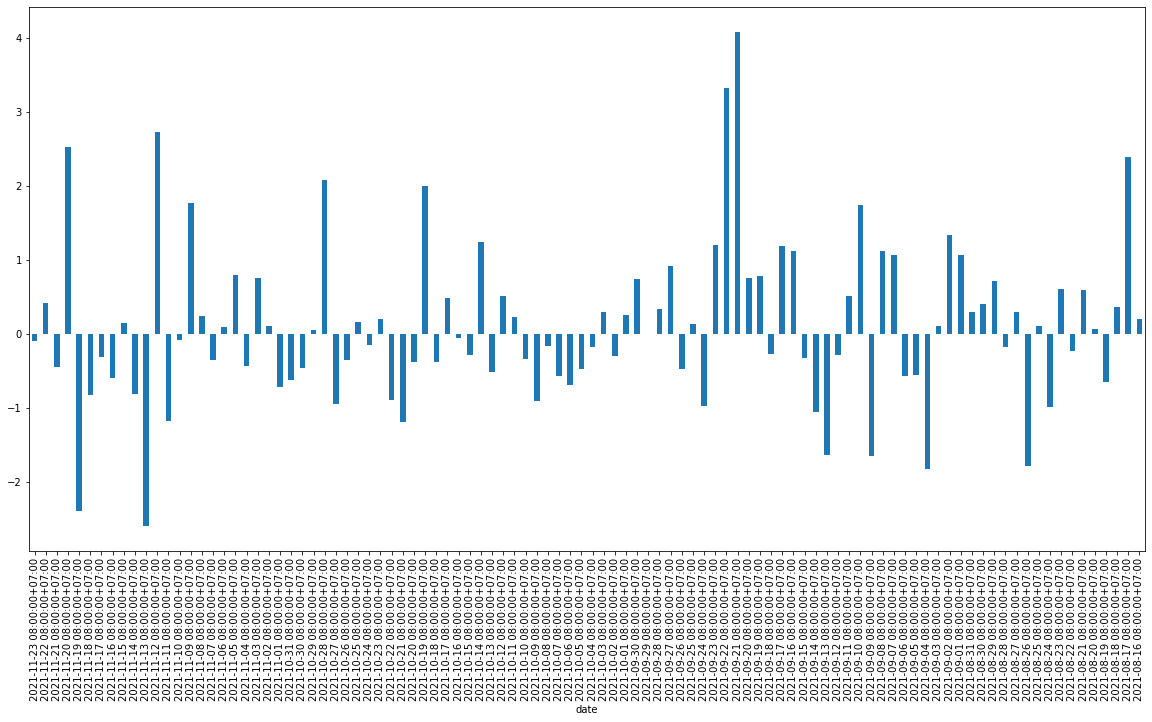

<Figure size 720x720 with 0 Axes>

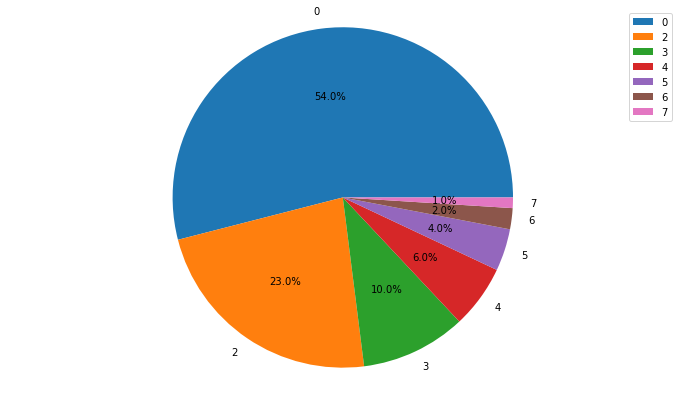

type_continuous_8
0    54
2    23
3    10
4     6
5     4
6     2
7     1
dtype: int64


In [38]:
hour_observe = 8

data_price_8 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 9
________________________________
count    51.000000
mean      0.564463
std       0.575076
min       0.000000
25%       0.186619
50%       0.359712
75%       0.701047
max       3.088153
Name: hour_return, dtype: float64
28.787601729828427
+++
count    49.000000
mean     -0.717471
std       0.725862
min      -4.372842
25%      -1.013662
50%      -0.501543
75%      -0.238663
max      -0.055402
Name: hour_return, dtype: float64
-35.15609440543838
____________________________________________________________


<ipython-input-29-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


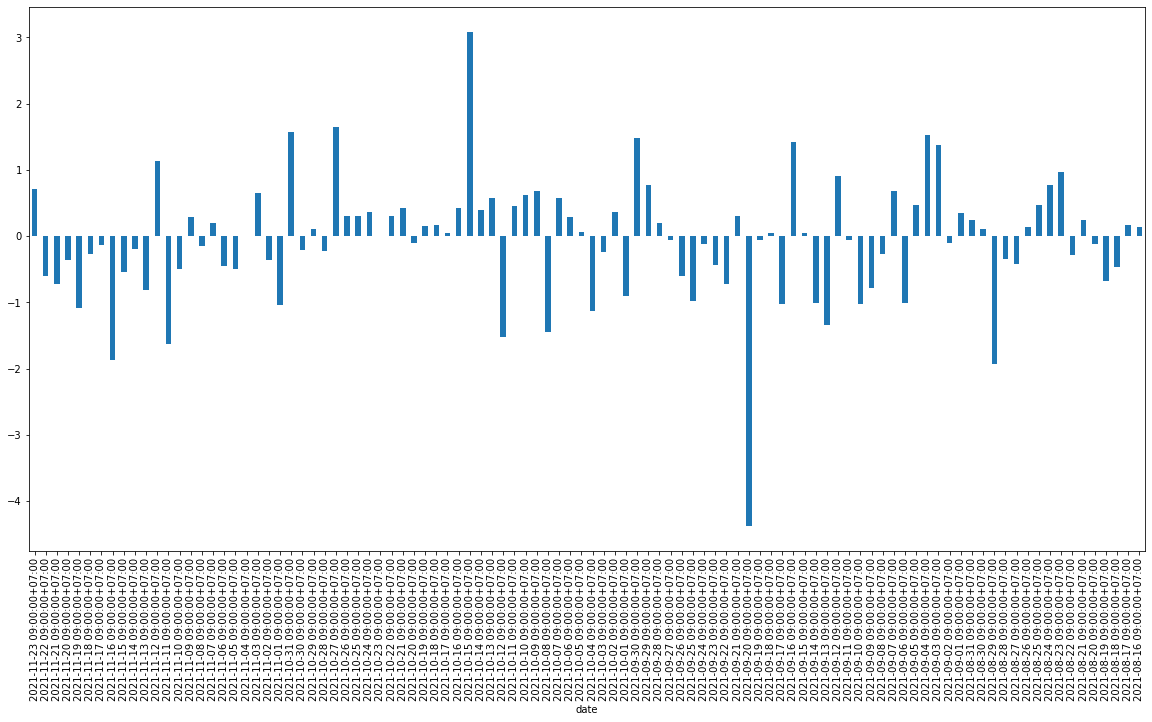

<Figure size 720x720 with 0 Axes>

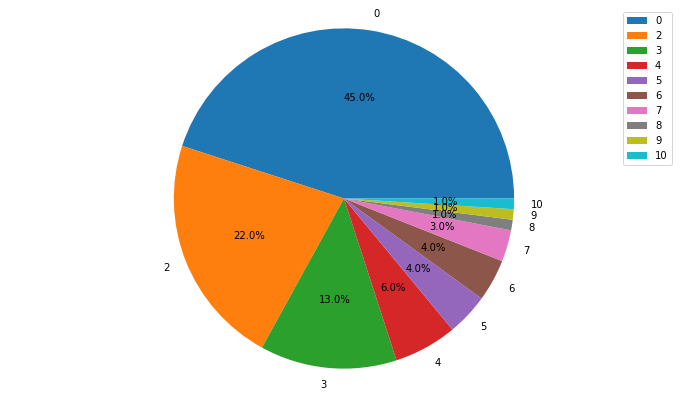

type_continuous_9
0     45
2     22
3     13
4      6
5      4
6      4
7      3
8      1
9      1
10     1
dtype: int64


In [39]:
hour_observe = 9

data_price_9 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 10
________________________________
count    51.000000
mean      0.550573
std       0.473390
min       0.000000
25%       0.190150
50%       0.487126
75%       0.813284
max       2.020619
Name: hour_return, dtype: float64
28.079226681962616
+++
count    49.000000
mean     -0.765678
std       0.683343
min      -3.146853
25%      -0.957207
50%      -0.620068
75%      -0.308833
max      -0.027448
Name: hour_return, dtype: float64
-37.51823489362772
____________________________________________________________


<ipython-input-29-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


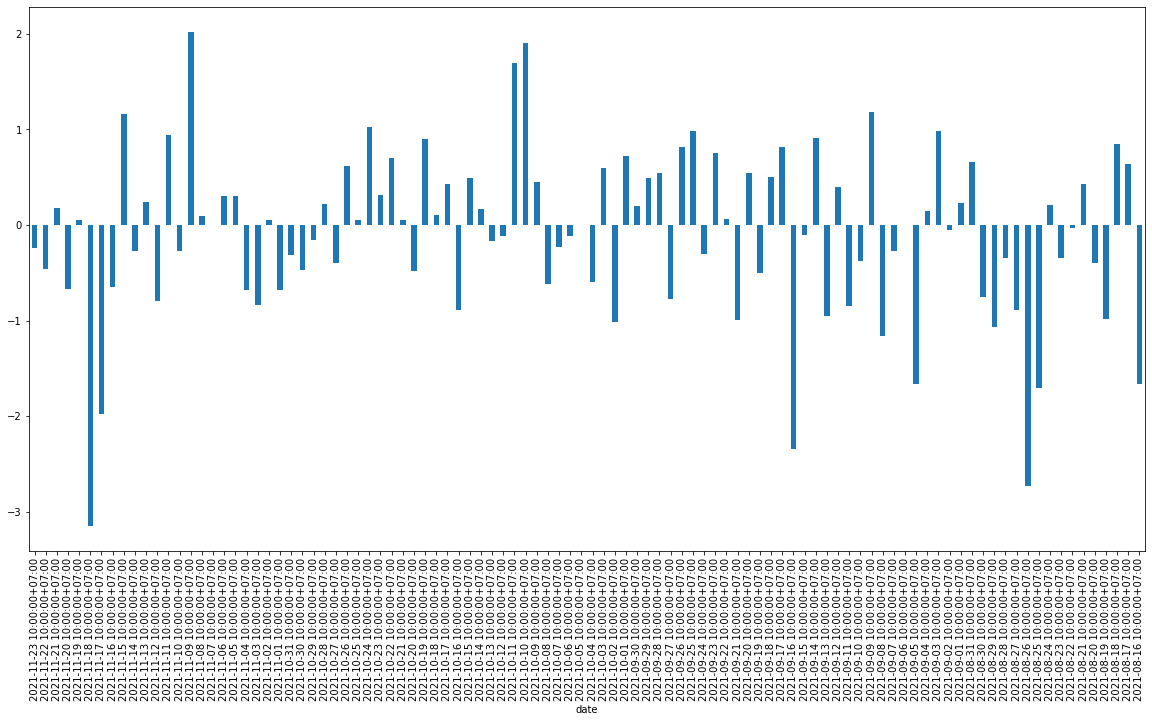

<Figure size 720x720 with 0 Axes>

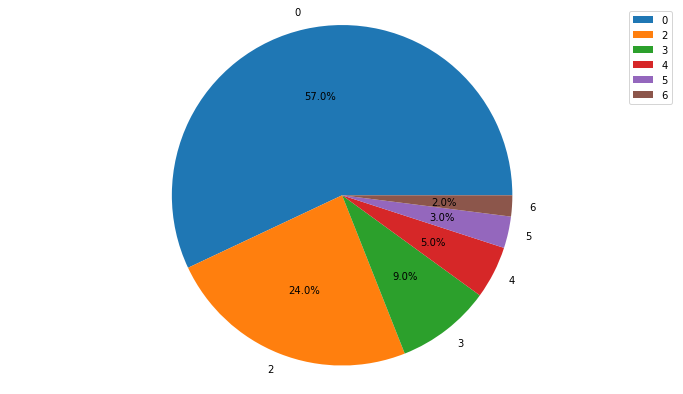

type_continuous_10
0    57
2    24
3     9
4     5
5     3
6     2
dtype: int64


In [40]:
hour_observe = 10

data_price_10 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 11
________________________________
count    52.000000
mean      0.660644
std       0.765910
min       0.000000
25%       0.204261
50%       0.399283
75%       0.854292
max       3.614458
Name: hour_return, dtype: float64
34.35349099511653
+++
count    49.000000
mean     -0.440578
std       0.413167
min      -1.738076
25%      -0.552181
50%      -0.316289
75%      -0.136861
max      -0.017255
Name: hour_return, dtype: float64
-21.588336424987304
____________________________________________________________


<ipython-input-29-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


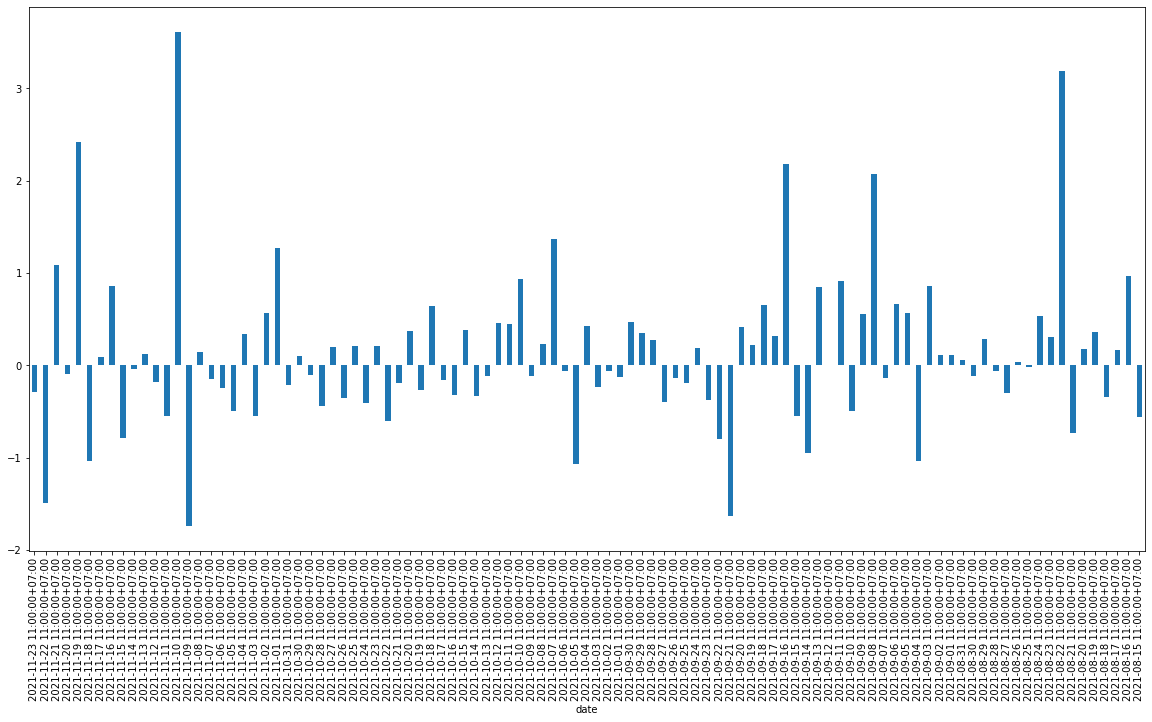

<Figure size 720x720 with 0 Axes>

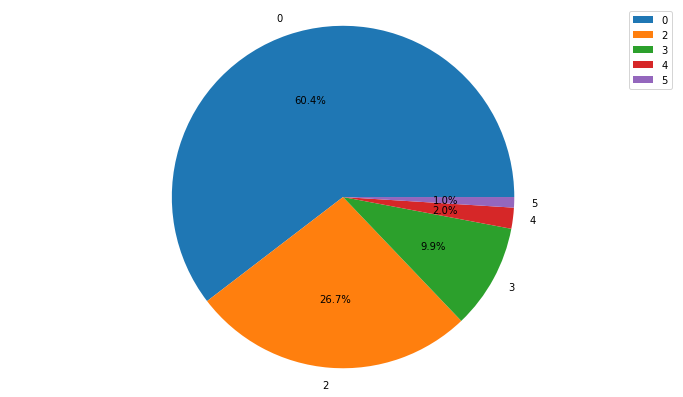

type_continuous_11
0    61
2    27
3    10
4     2
5     1
dtype: int64


In [41]:
hour_observe = 11

data_price_11 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 12
________________________________
count    57.000000
mean      0.606077
std       0.505297
min       0.000000
25%       0.250627
50%       0.500556
75%       0.735710
max       2.324645
Name: hour_return, dtype: float64
34.54636172794104
+++
count    44.000000
mean     -0.557236
std       0.560190
min      -2.760207
25%      -0.743464
50%      -0.362229
75%      -0.190205
max      -0.037602
Name: hour_return, dtype: float64
-24.518400462738335
____________________________________________________________


<ipython-input-29-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


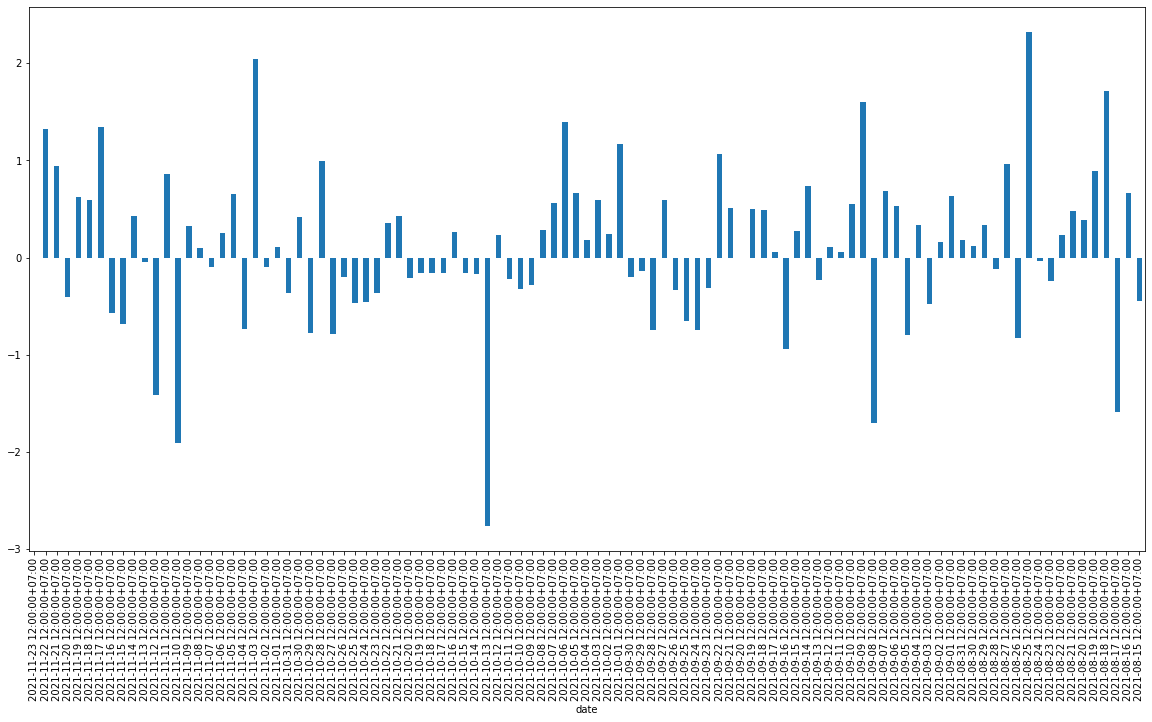

<Figure size 720x720 with 0 Axes>

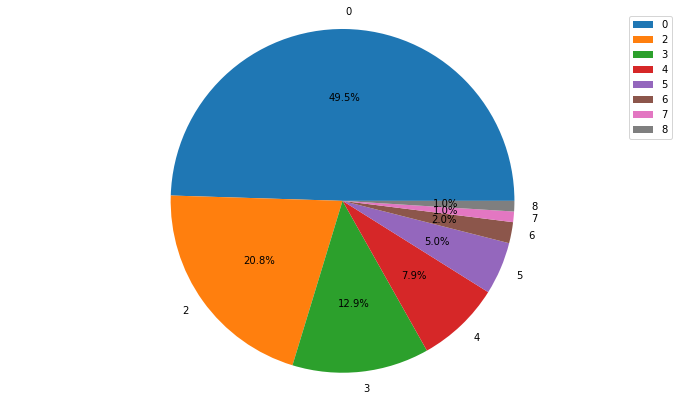

type_continuous_12
0    50
2    21
3    13
4     8
5     5
6     2
7     1
8     1
dtype: int64


In [42]:
hour_observe = 12

data_price_12 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 13
________________________________
count    50.000000
mean      0.555815
std       0.558080
min       0.000000
25%       0.187273
50%       0.479181
75%       0.757578
max       3.286206
Name: hour_return, dtype: float64
27.790773332220372
+++
count    50.000000
mean     -0.589039
std       0.598627
min      -3.740927
25%      -0.655106
50%      -0.465438
75%      -0.245929
max      -0.039608
Name: hour_return, dtype: float64
-29.451957641105388
____________________________________________________________


<ipython-input-29-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


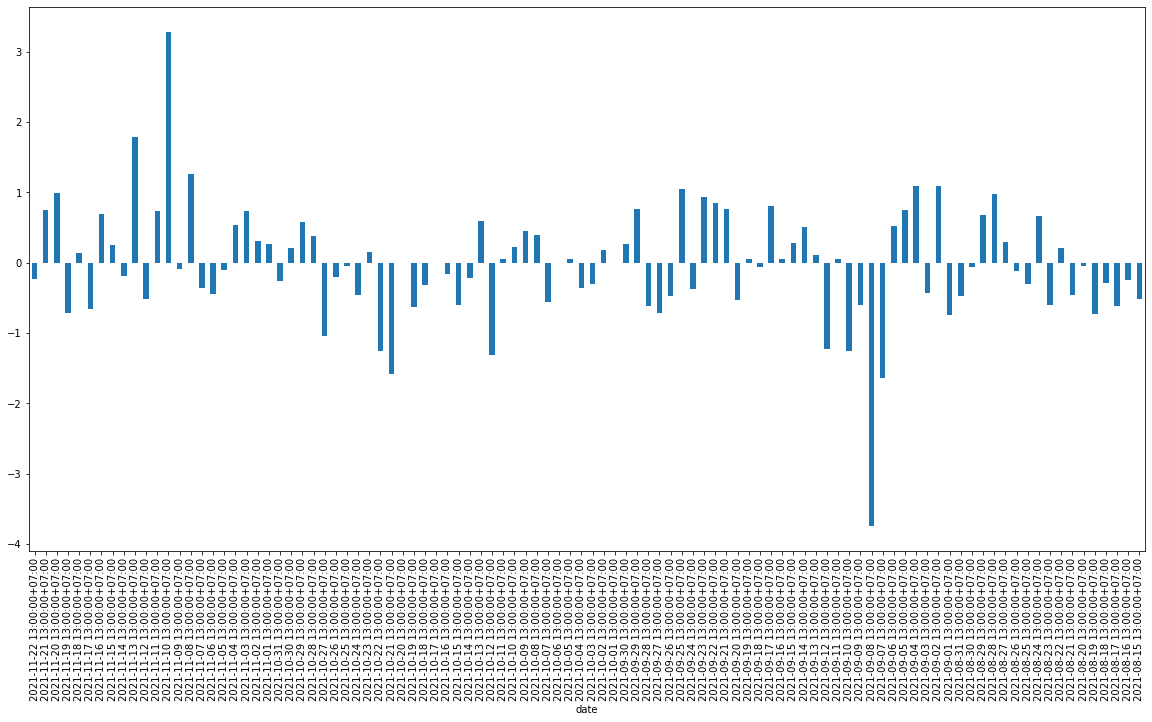

<Figure size 720x720 with 0 Axes>

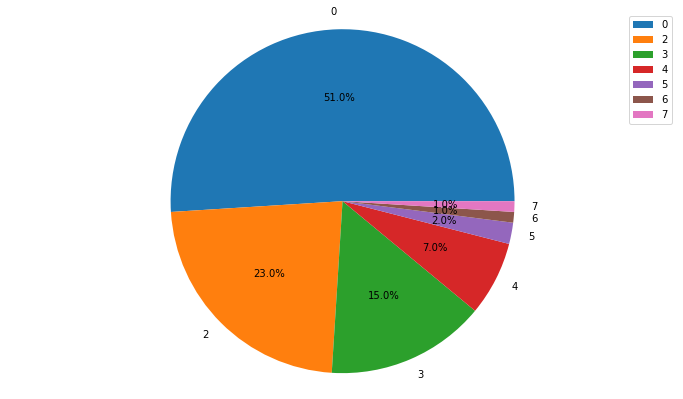

type_continuous_13
0    51
2    23
3    15
4     7
5     2
6     1
7     1
dtype: int64


In [43]:
hour_observe = 13

data_price_13 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 14
________________________________
count    47.000000
mean      0.697082
std       0.795746
min       0.000000
25%       0.135670
50%       0.506329
75%       1.015574
max       3.869882
Name: hour_return, dtype: float64
32.762843059879
+++
count    52.000000
mean     -0.804769
std       0.732654
min      -4.214752
25%      -1.066290
50%      -0.585777
75%      -0.322819
max      -0.040535
Name: hour_return, dtype: float64
-41.84799415237026
____________________________________________________________


<ipython-input-29-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


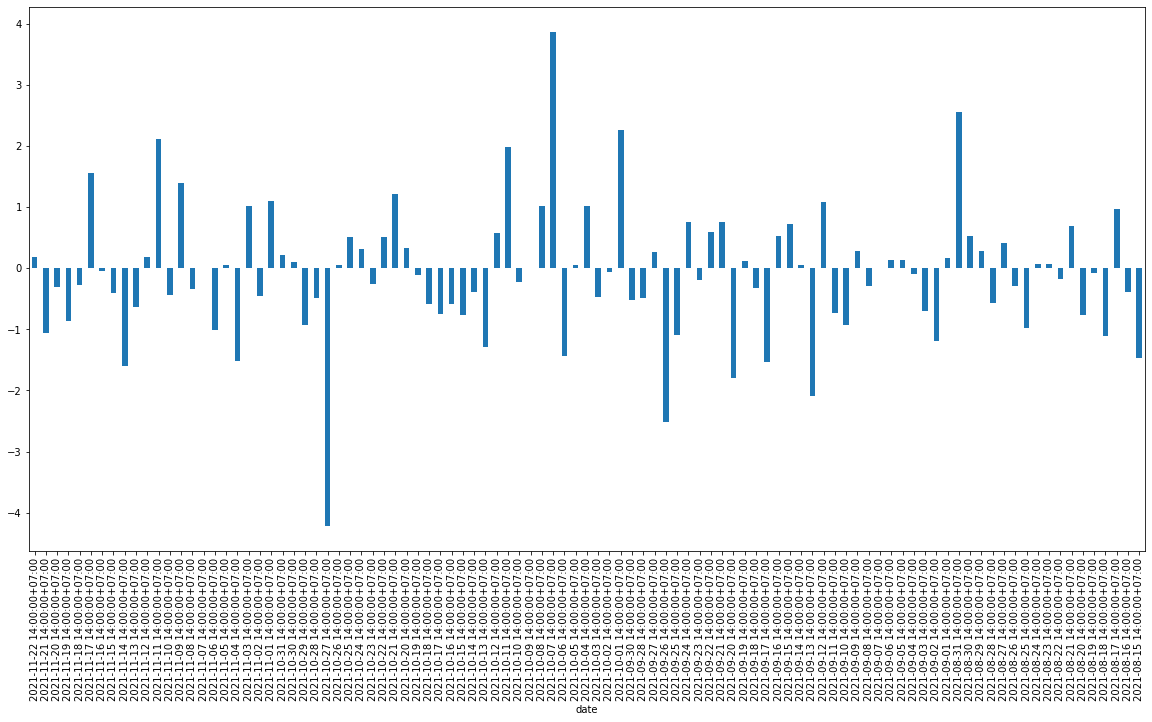

<Figure size 720x720 with 0 Axes>

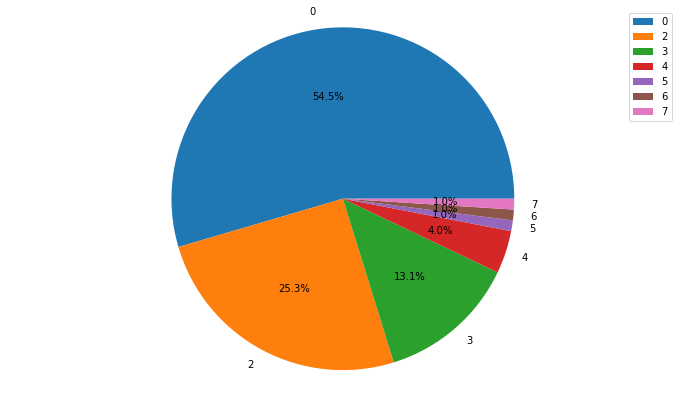

type_continuous_14
0    54
2    25
3    13
4     4
5     1
6     1
7     1
dtype: int64


In [44]:
hour_observe = 14

data_price_14 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 15
________________________________
count    59.000000
mean      0.782988
std       0.976679
min       0.000000
25%       0.189532
50%       0.409626
75%       0.728334
max       4.447566
Name: hour_return, dtype: float64
46.1962960682251
+++
count    40.000000
mean     -0.782089
std       0.847324
min      -3.352541
25%      -0.812857
50%      -0.530582
75%      -0.305680
max      -0.050684
Name: hour_return, dtype: float64
-31.283555494929416
____________________________________________________________


<ipython-input-29-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


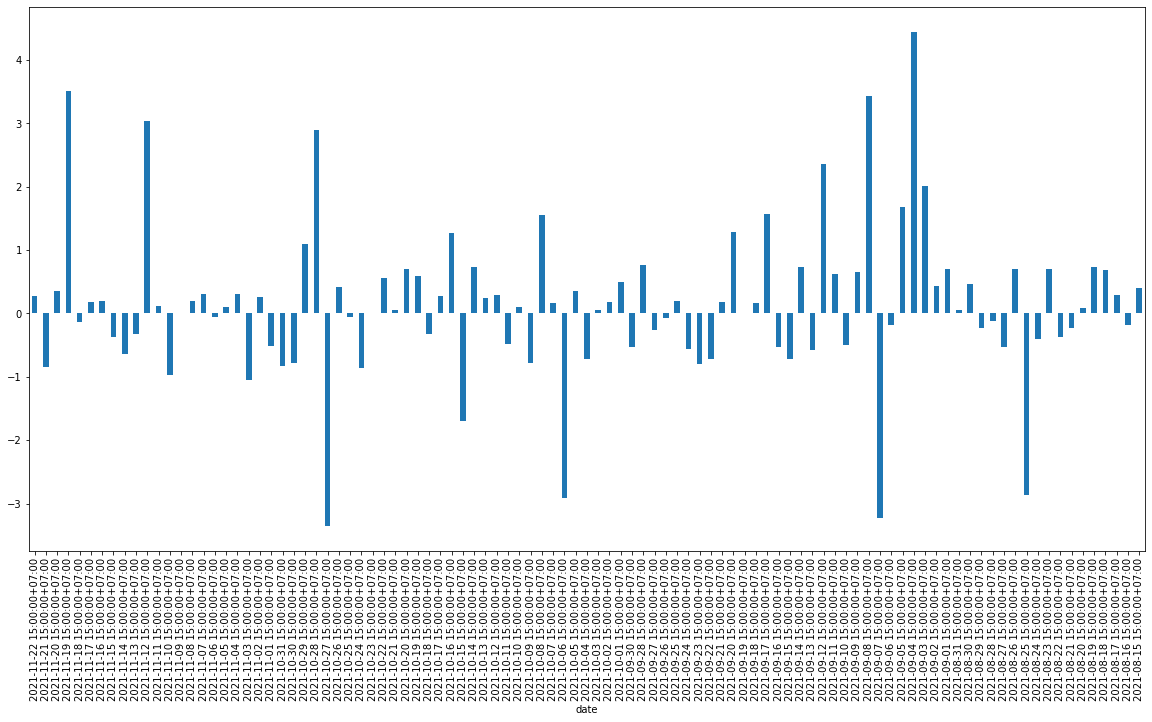

<Figure size 720x720 with 0 Axes>

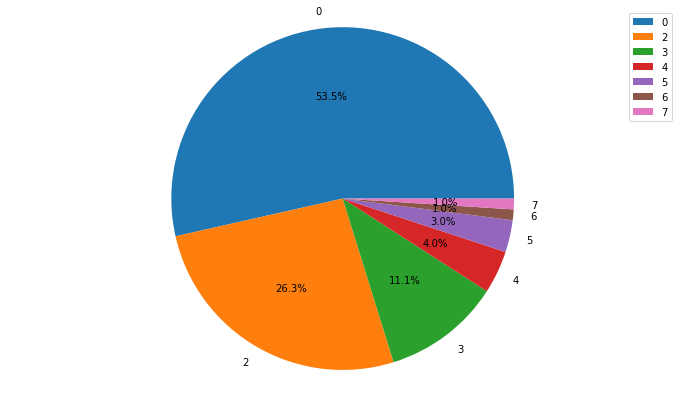

type_continuous_15
0    53
2    26
3    11
4     4
5     3
6     1
7     1
dtype: int64


In [45]:
hour_observe = 15

data_price_15 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 16
________________________________
count    51.000000
mean      0.745496
std       0.895627
min       0.000000
25%       0.204275
50%       0.406268
75%       0.961438
max       4.881450
Name: hour_return, dtype: float64
38.02031972667487
+++
count    49.000000
mean     -0.947963
std       1.307234
min      -7.191995
25%      -0.985222
50%      -0.492611
75%      -0.275103
max      -0.059277
Name: hour_return, dtype: float64
-46.45018236804955
____________________________________________________________


<ipython-input-29-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


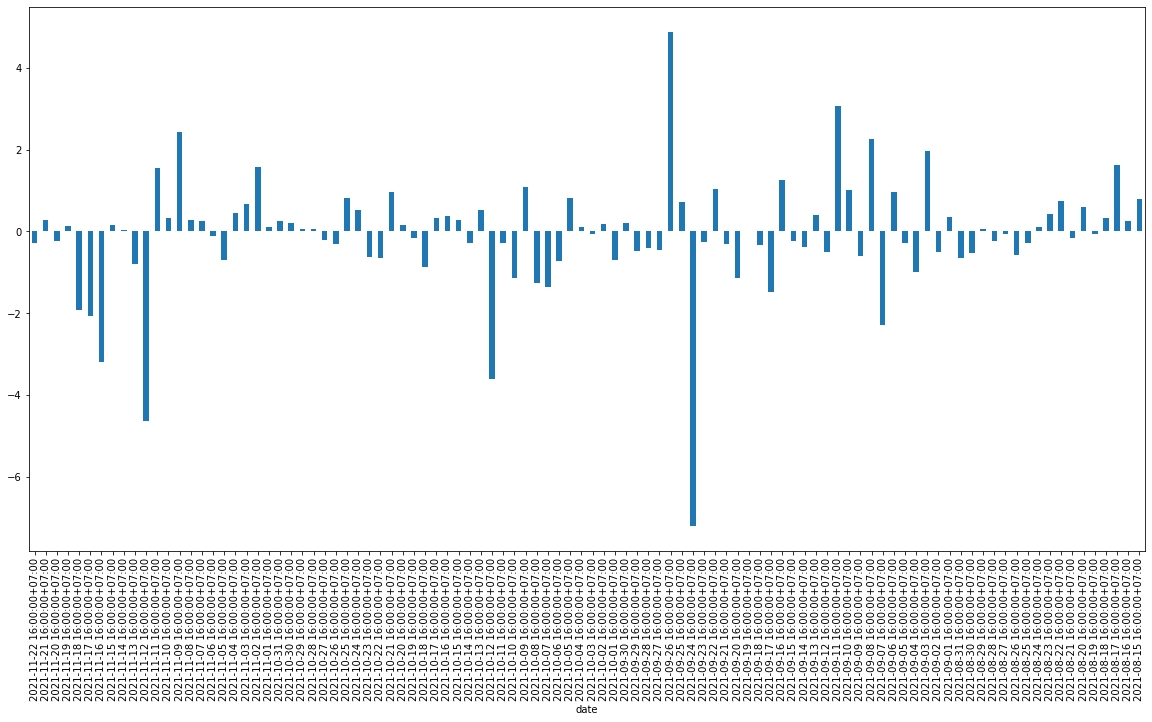

<Figure size 720x720 with 0 Axes>

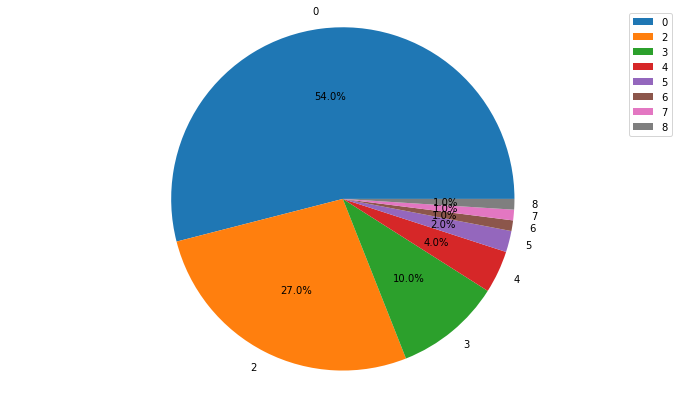

type_continuous_16
0    54
2    27
3    10
4     4
5     2
6     1
7     1
8     1
dtype: int64


In [46]:
hour_observe = 16

data_price_16 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 17
________________________________
count    47.000000
mean      0.773591
std       0.905932
min       0.000000
25%       0.190603
50%       0.527704
75%       0.952318
max       4.263207
Name: hour_return, dtype: float64
36.35876137612633
+++
count    53.000000
mean     -0.694608
std       0.548178
min      -2.533937
25%      -0.930851
50%      -0.570342
75%      -0.273523
max      -0.053619
Name: hour_return, dtype: float64
-36.81422295161011
____________________________________________________________


<ipython-input-29-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


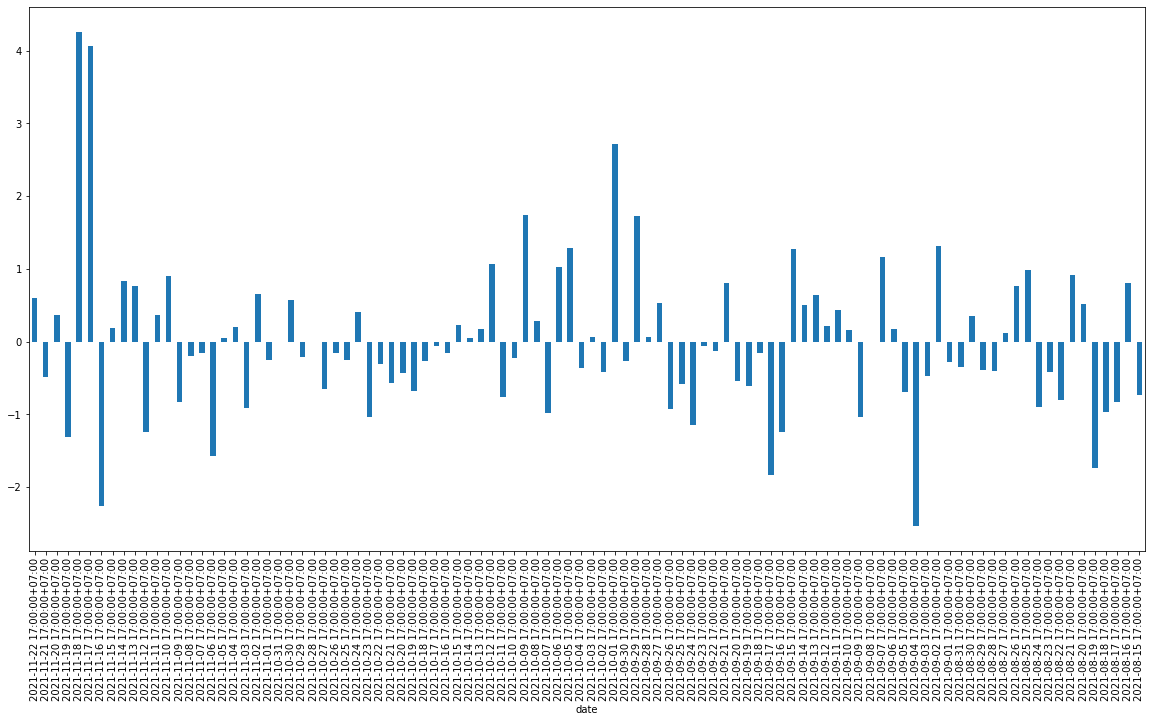

<Figure size 720x720 with 0 Axes>

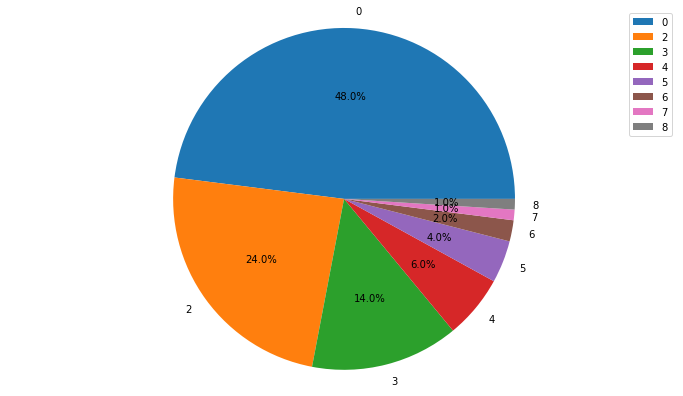

type_continuous_17
0    48
2    24
3    14
4     6
5     4
6     2
7     1
8     1
dtype: int64


In [47]:
hour_observe = 17

data_price_17 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 18
________________________________
count    52.000000
mean      0.858754
std       1.032191
min       0.000000
25%       0.354983
50%       0.592204
75%       1.125142
max       6.790353
Name: hour_return, dtype: float64
44.6552273451603
+++
count    48.000000
mean     -0.926272
std       0.805803
min      -3.553922
25%      -1.267570
50%      -0.728007
75%      -0.426086
max      -0.047687
Name: hour_return, dtype: float64
-44.46106179651848
____________________________________________________________


<ipython-input-29-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


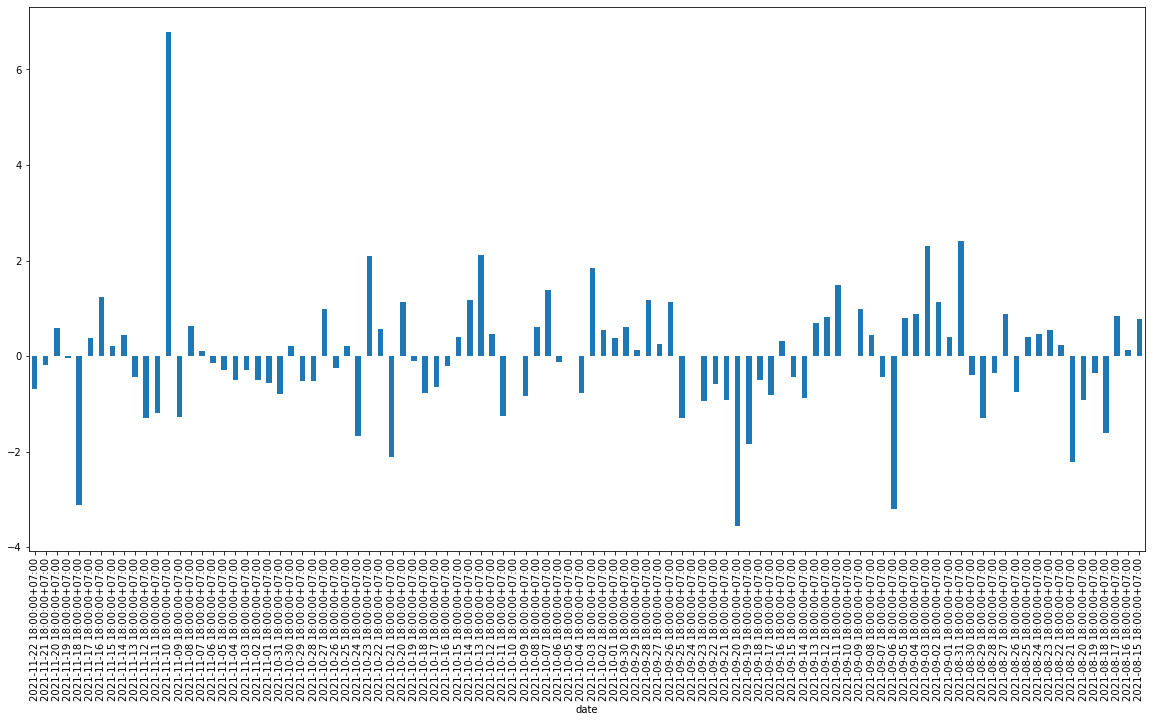

<Figure size 720x720 with 0 Axes>

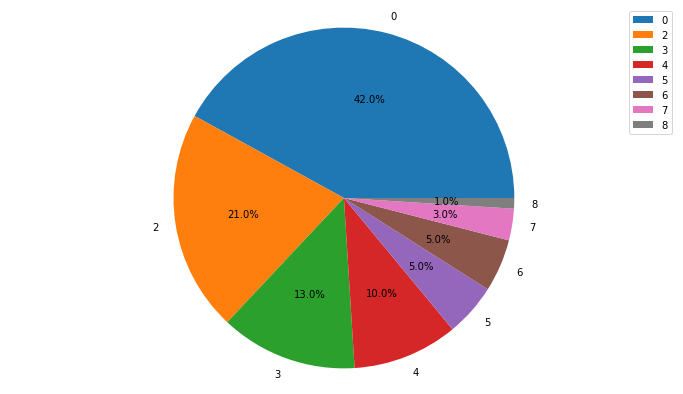

type_continuous_18
0    42
2    21
3    13
4    10
5     5
6     5
7     3
8     1
dtype: int64


In [48]:
hour_observe = 18

data_price_18 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 19
________________________________
count    46.000000
mean      0.772043
std       1.003832
min       0.000000
25%       0.277637
50%       0.503129
75%       0.876430
max       6.302521
Name: hour_return, dtype: float64
35.5139872033529
+++
count    54.000000
mean     -0.669428
std       0.582732
min      -2.292683
25%      -0.971482
50%      -0.561097
75%      -0.230131
max      -0.046620
Name: hour_return, dtype: float64
-36.14912236019513
____________________________________________________________


<ipython-input-29-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


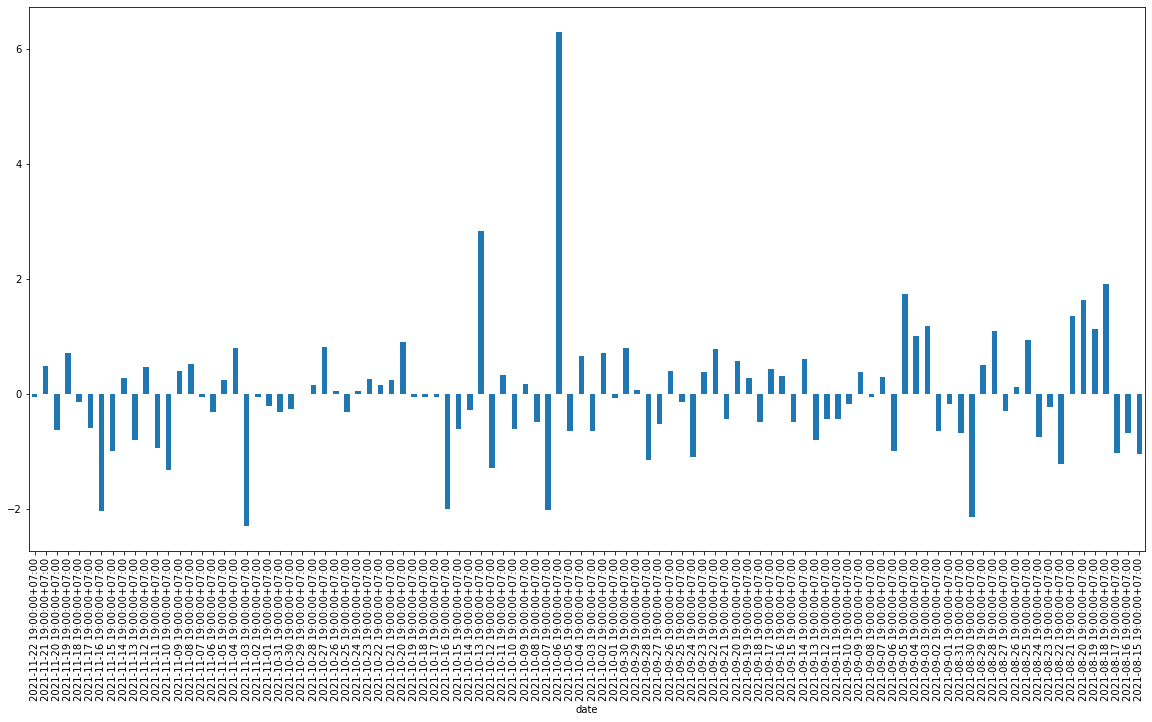

<Figure size 720x720 with 0 Axes>

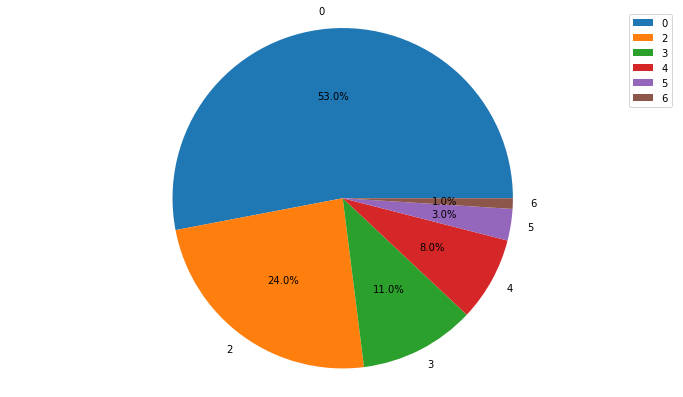

type_continuous_19
0    53
2    24
3    11
4     8
5     3
6     1
dtype: int64


In [49]:
hour_observe = 19

data_price_19 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 20
________________________________
count    65.000000
mean      1.273944
std       3.073212
min       0.000000
25%       0.329164
50%       0.662252
75%       1.379310
max      24.942529
Name: hour_return, dtype: float64
82.80638582083
+++
count    35.000000
mean     -0.813930
std       0.760626
min      -3.314607
25%      -1.121904
50%      -0.558659
75%      -0.328485
max      -0.050302
Name: hour_return, dtype: float64
-28.487540368692194
____________________________________________________________


<ipython-input-29-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


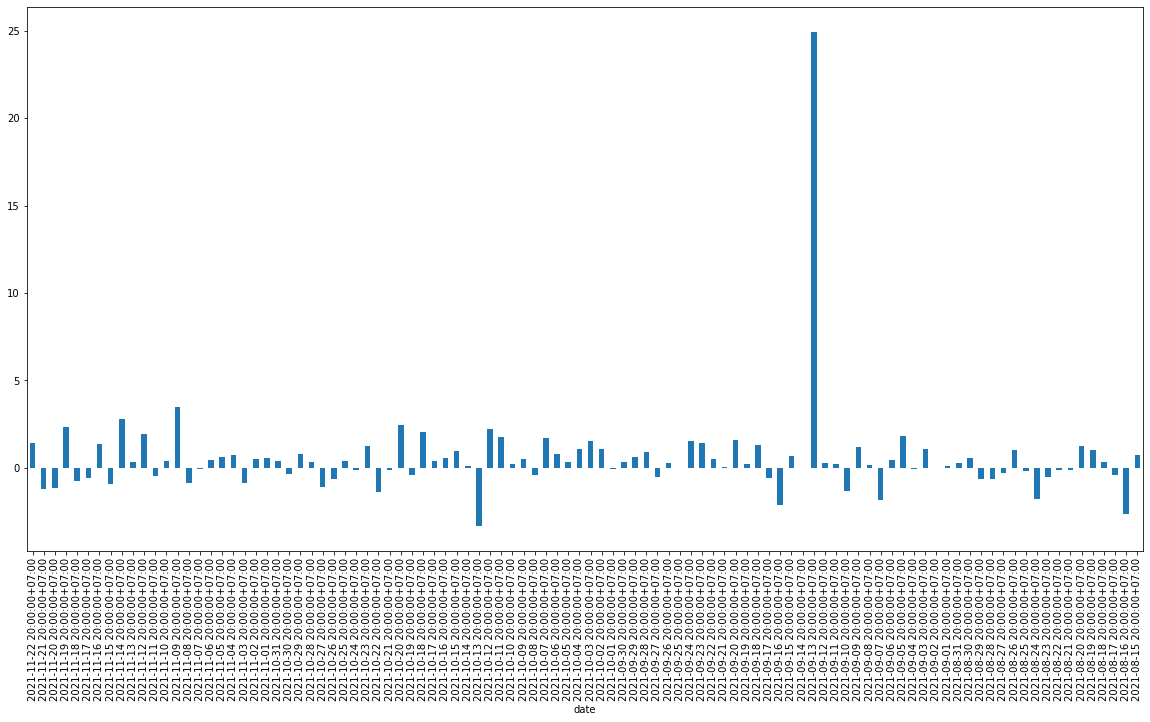

<Figure size 720x720 with 0 Axes>

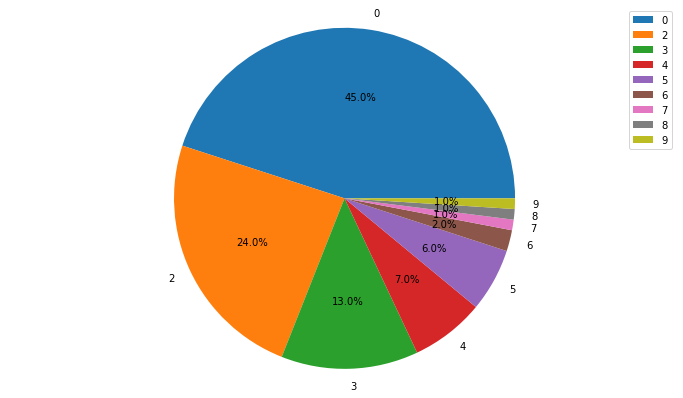

type_continuous_20
0    45
2    24
3    13
4     7
5     6
6     2
7     1
8     1
9     1
dtype: int64


In [50]:
hour_observe = 20

data_price_20 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 21
________________________________
count    45.000000
mean      0.846085
std       1.010413
min       0.000000
25%       0.197889
50%       0.604230
75%       1.086113
max       5.596107
Name: hour_return, dtype: float64
38.07382120073943
+++
count    55.000000
mean     -1.516228
std       2.646463
min     -17.909761
25%      -1.570190
50%      -0.871586
75%      -0.543186
max      -0.054083
Name: hour_return, dtype: float64
-83.39255435123903
____________________________________________________________


<ipython-input-29-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


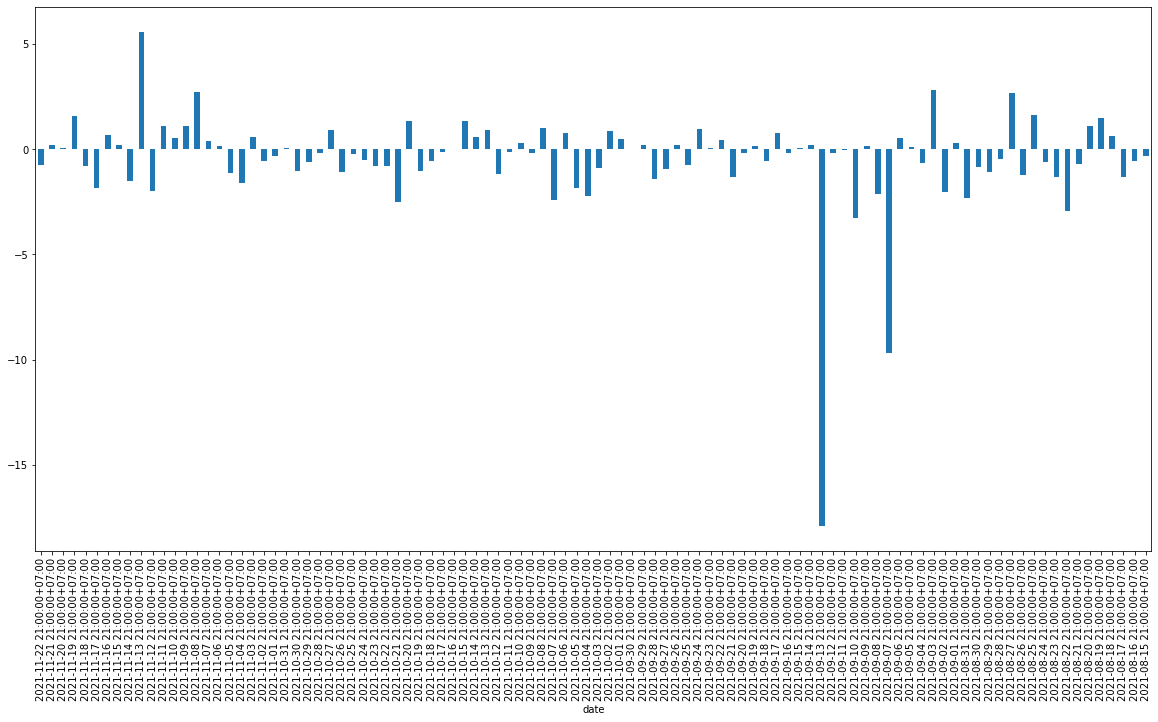

<Figure size 720x720 with 0 Axes>

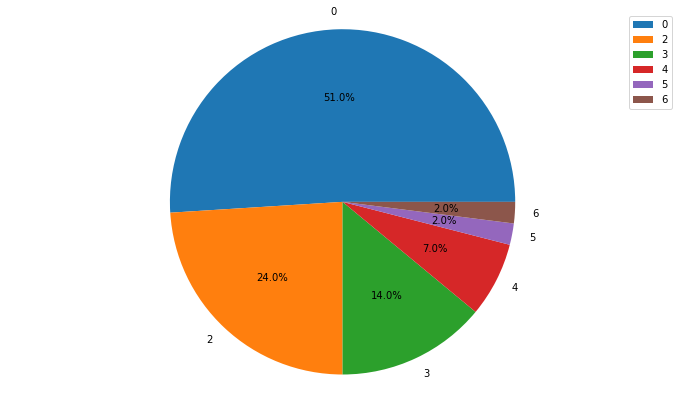

type_continuous_21
0    51
2    24
3    14
4     7
5     2
6     2
dtype: int64


In [51]:
hour_observe = 21

data_price_21 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 22
________________________________
count    60.000000
mean      0.827212
std       0.655387
min       0.000000
25%       0.277830
50%       0.669422
75%       1.231939
max       2.872984
Name: hour_return, dtype: float64
49.63273150451167
+++
count    40.000000
mean     -0.856870
std       0.692988
min      -3.343582
25%      -1.130964
50%      -0.695758
75%      -0.386383
max      -0.053191
Name: hour_return, dtype: float64
-34.274807884416795
____________________________________________________________


<ipython-input-29-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


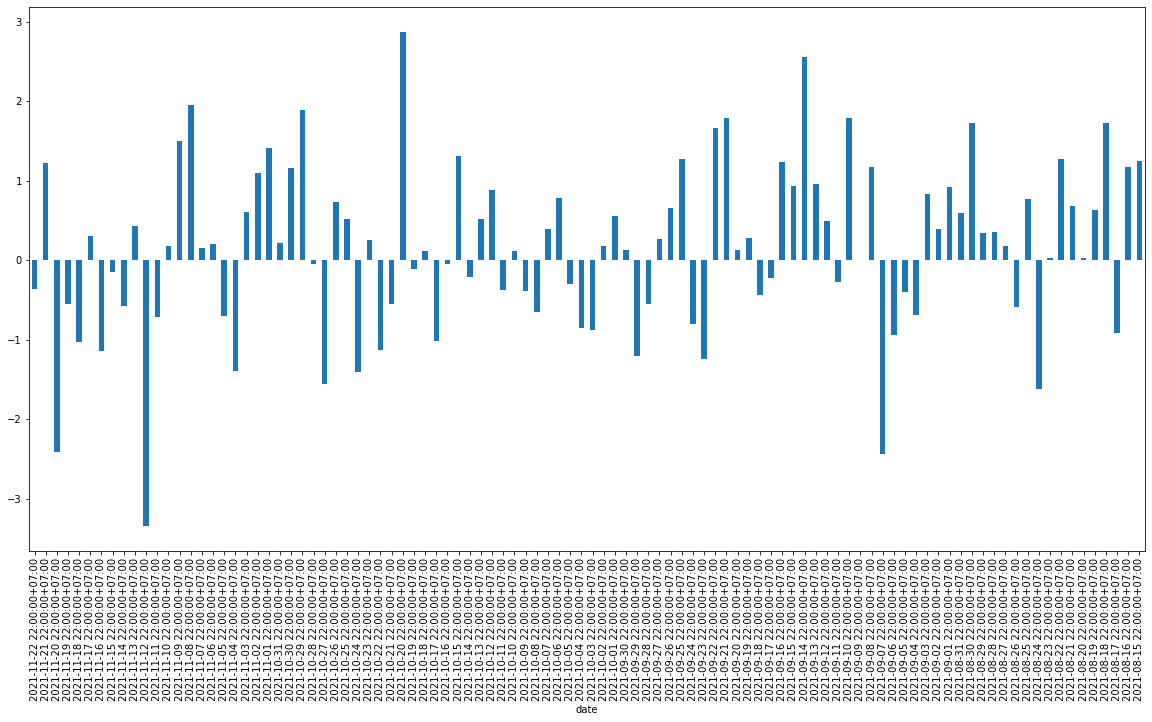

<Figure size 720x720 with 0 Axes>

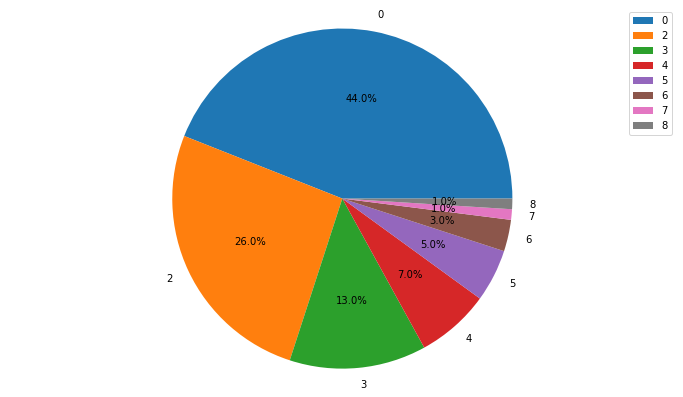

type_continuous_22
0    44
2    26
3    13
4     7
5     5
6     3
7     1
8     1
dtype: int64


In [52]:
hour_observe = 22

data_price_22 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 23
________________________________
count    54.000000
mean      0.727308
std       0.730994
min       0.000000
25%       0.240848
50%       0.449214
75%       1.026662
max       3.285078
Name: hour_return, dtype: float64
39.2746446277476
+++
count    46.000000
mean     -0.637026
std       0.556337
min      -2.781707
25%      -0.788419
50%      -0.533567
75%      -0.271958
max      -0.057274
Name: hour_return, dtype: float64
-29.303173284224947
____________________________________________________________


<ipython-input-29-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


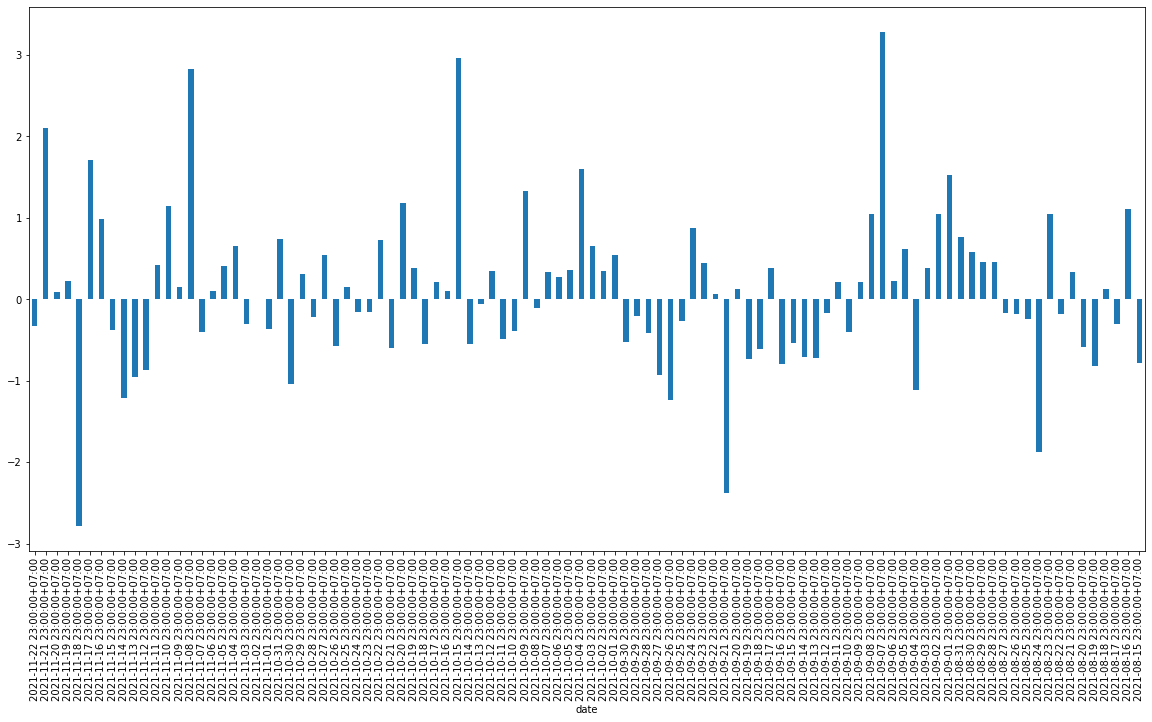

<Figure size 720x720 with 0 Axes>

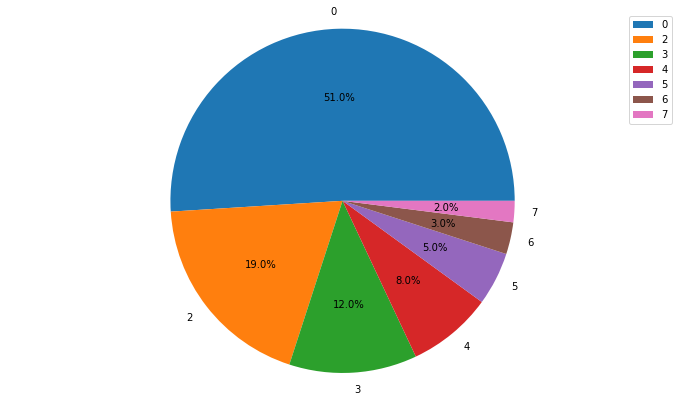

type_continuous_23
0    51
2    19
3    12
4     8
5     5
6     3
7     2
dtype: int64


In [53]:
hour_observe = 23

data_price_23 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 0
________________________________
count    45.000000
mean      0.746703
std       1.172447
min       0.000000
25%       0.132363
50%       0.449102
75%       0.677083
max       6.996047
Name: hour_return, dtype: float64
33.60163377611355
+++
count    55.000000
mean     -0.609469
std       0.441507
min      -2.155172
25%      -0.900919
50%      -0.566135
75%      -0.263921
max      -0.050201
Name: hour_return, dtype: float64
-33.52082022121377
____________________________________________________________


<ipython-input-29-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


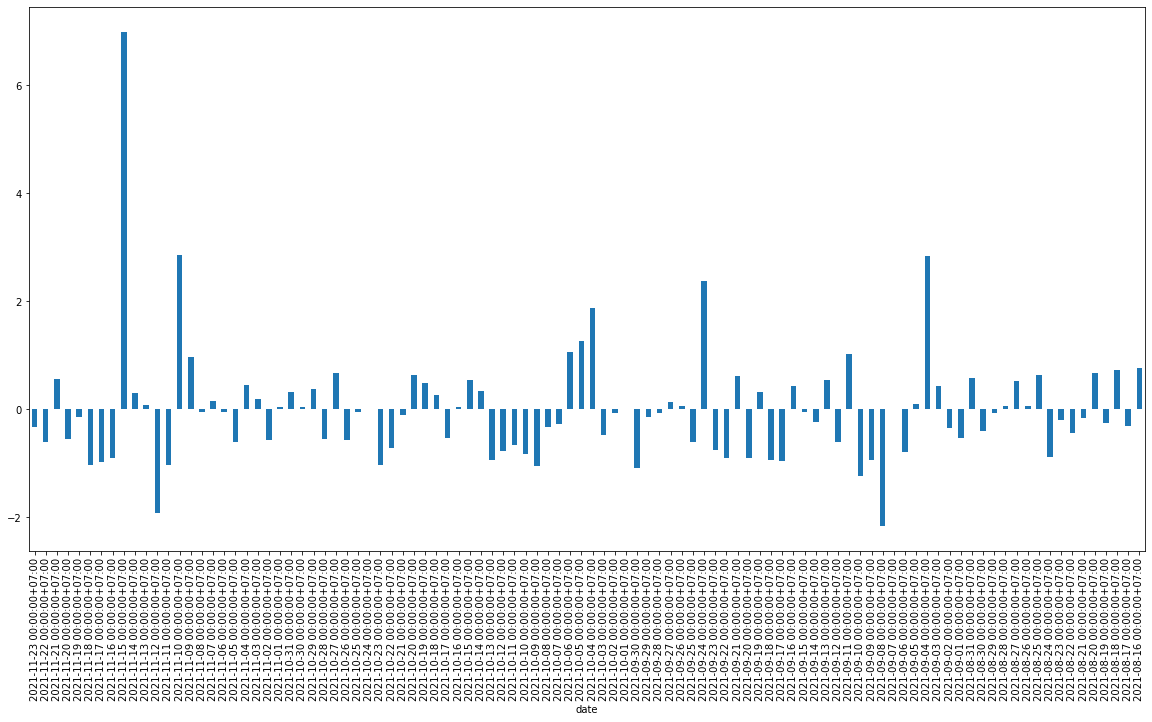

<Figure size 720x720 with 0 Axes>

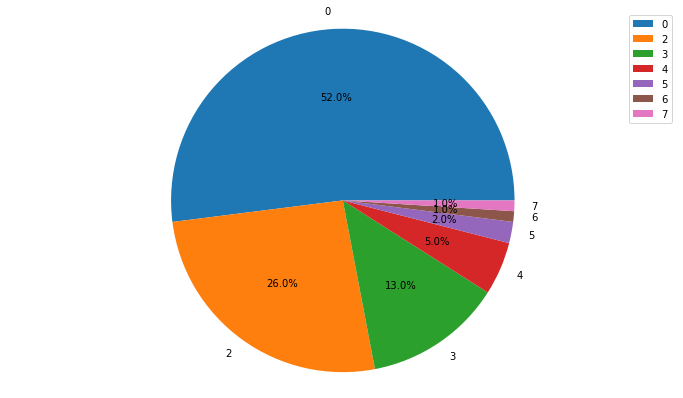

type_continuous_0
0    52
2    26
3    13
4     5
5     2
6     1
7     1
dtype: int64


In [54]:
hour_observe = 0

data_price_0 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)